Starting the Project by importing in the file and displaying the top rows of it

In [3]:
import os
import numpy as np
import xgboost as xgb
from catboost import CatBoostClassifier
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from numpy import inf

import warnings
warnings.filterwarnings(action="ignore")

Reading the Main Data File and Displaying Column Information.

In [4]:
%matplotlib inline

FilePath = "data.csv"
MainBankData = pd.read_csv(FilePath,skipinitialspace=True)
# MainBankData.info()
MainBankData = MainBankData.rename(columns={"Bankrupt?": "Bankrupt"})
MainBankData

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


## Exploratory Data Analysis

Making a Correlation Map without any categorial Variable.

In [5]:
CorrelationDataFrame = MainBankData.copy(deep=True)
CorrelationDataFrame.drop('Net Income Flag',axis=1,inplace=True)
CorrelationDataFrame.drop('Liability-Assets Flag',axis=1,inplace=True)

<AxesSubplot:>

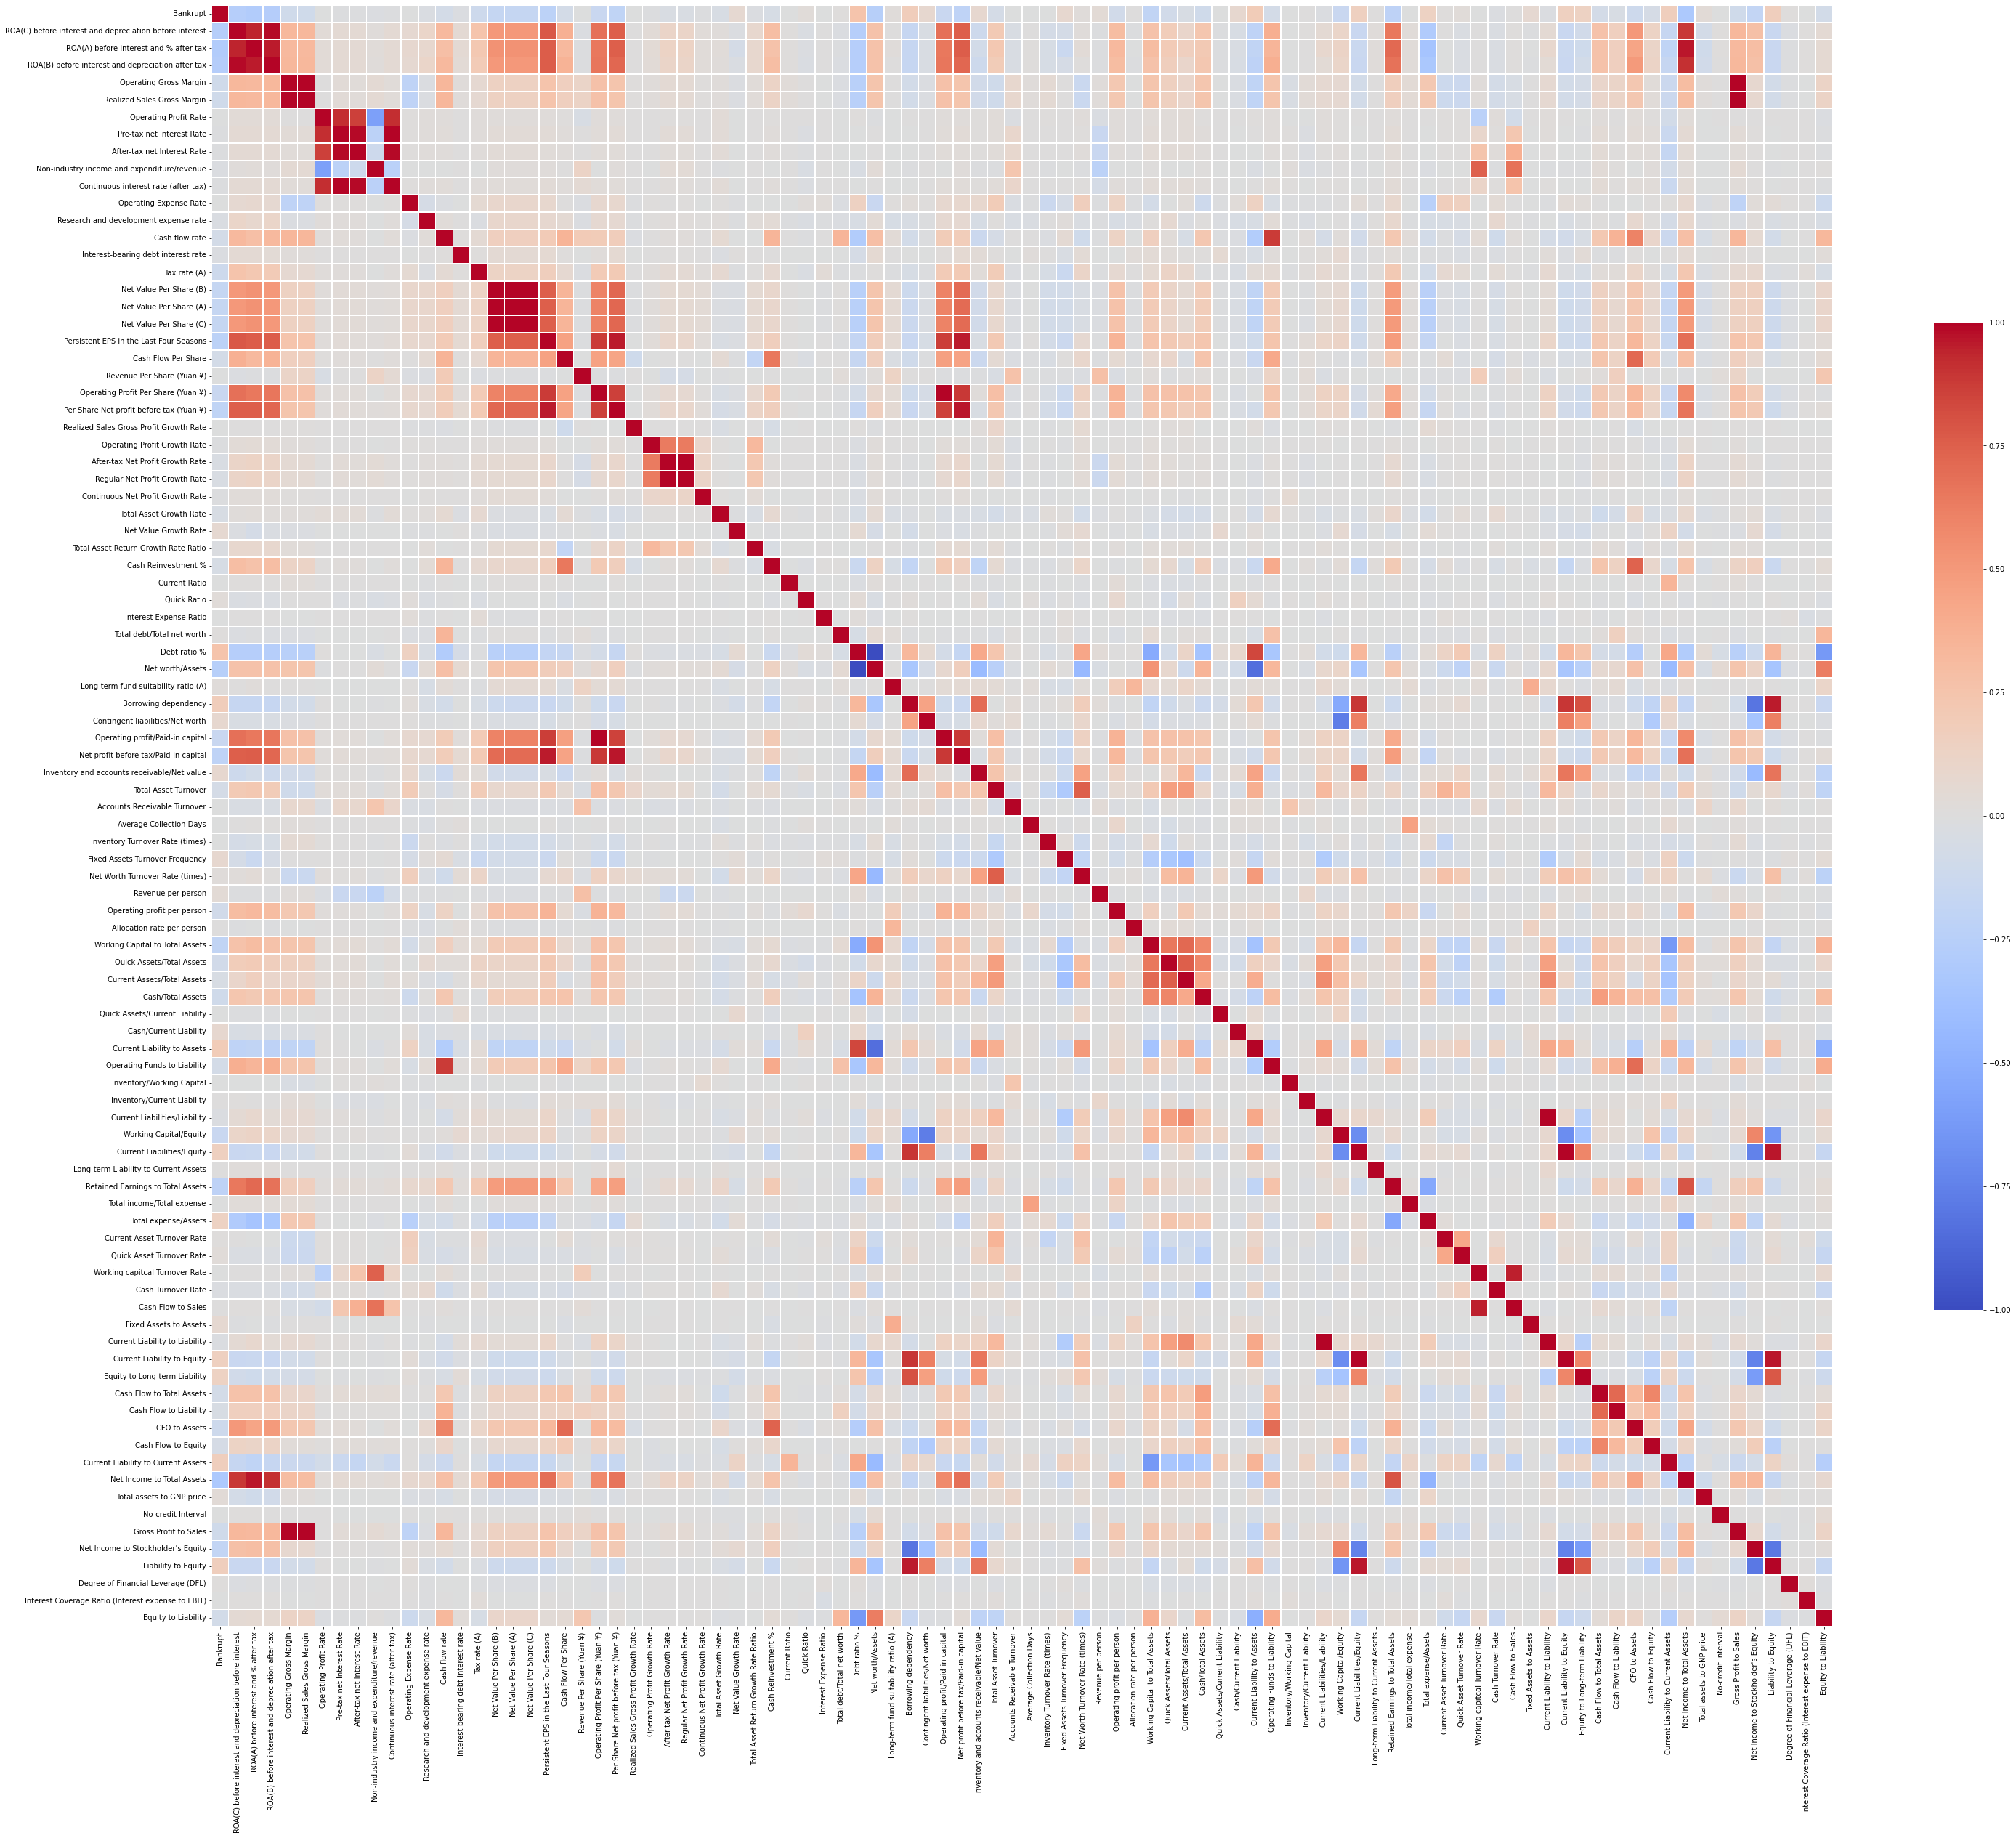

In [6]:
Var_Corr = CorrelationDataFrame.corr()
Var_Corr
figMainCorrelationMap, axes = plt.subplots(figsize=(50,50))
sns.heatmap(Var_Corr,cmap='coolwarm',square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
bankruptCorrelation = abs(Var_Corr['Bankrupt'])
CorrelationDataFrame=pd.DataFrame(bankruptCorrelation)
CorrelationDataFrame.index

Index(['Bankrupt', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax 

Figuring out the variables with the highest Correlation with bankrupt variable.

Top 30 most correlated predictors To Bankrupt Variable : 
Index(['Bankrupt', 'Net Income to Total Assets',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'ROA(C) before interest and depreciation before interest',
       'Net worth/Assets', 'Debt ratio %',
       'Persistent EPS in the Last Four Seasons',
       'Retained Earnings to Total Assets',
       'Net profit before tax/Paid-in capital',
       'Per Share Net profit before tax (Yuan ¥)',
       'Current Liability to Assets', 'Working Capital to Total Assets',
       'Net Income to Stockholder's Equity', 'Borrowing dependency',
       'Current Liability to Current Assets', 'Liability to Equity',
       'Net Value Per Share (A)', 'Net Value Per Share (B)',
       'Net Value Per Share (C)', 'Current Liabilities/Equity',
       'Current Liability to Equity', 'Working Capital/Equity',
       'Operating Profit Per Share (Yuan ¥)',
       'Operating profit/Paid-in cap

<AxesSubplot:>

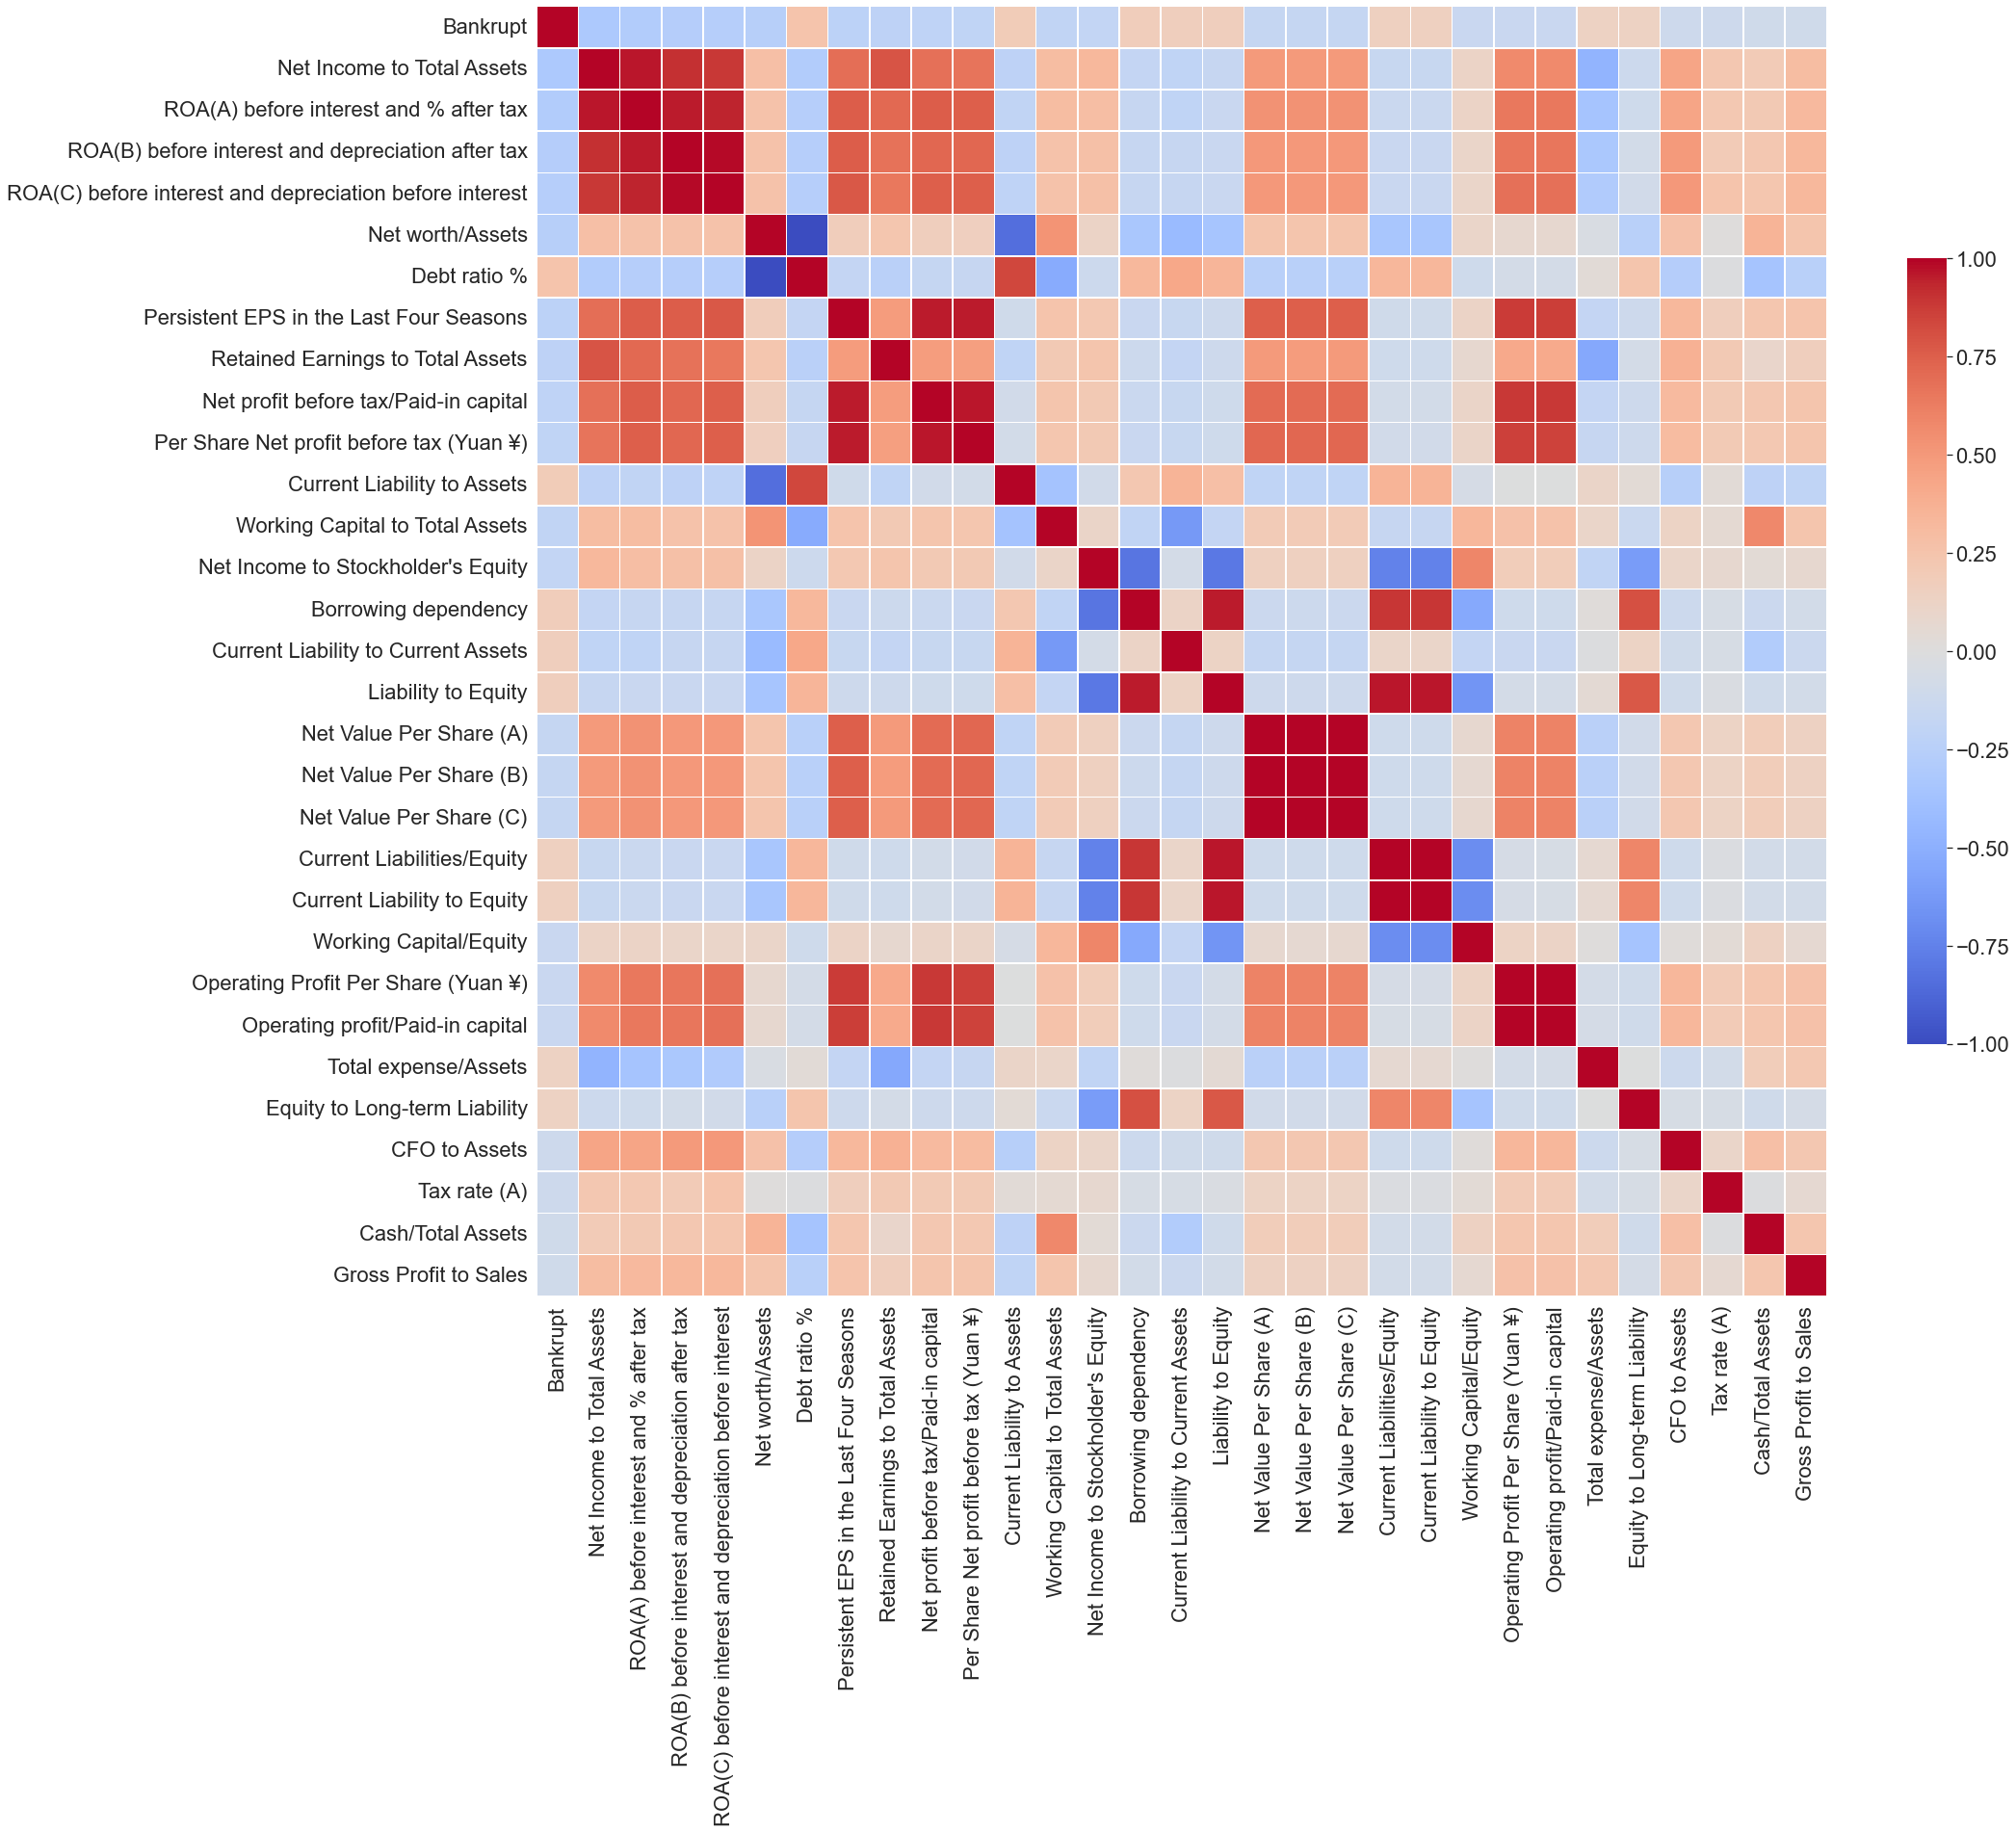

In [8]:
CorrelationDataFrame = CorrelationDataFrame.sort_values(by=['Bankrupt'], ascending=False)
CorrelationDataFrame
print('Top 30 most correlated predictors To Bankrupt Variable : ')
print(CorrelationDataFrame.index[0:31])
stringarray = CorrelationDataFrame.index[0:31]

Top30Predictors = MainBankData.loc[:,stringarray]
Correlation30Predictors = Top30Predictors.corr()
sns.set(font_scale=2)
figMainCorrelationMap, axes = plt.subplots(figsize=(30,30))
sns.heatmap(Correlation30Predictors,cmap='coolwarm',square=True, linewidths=.5,cbar_kws={"shrink": .5})

Count of Each Class in the Data set to visualize the imbalance

Bankrupt
0           6599
1            220
dtype: int64


<AxesSubplot:xlabel='Bankrupt', ylabel='count'>

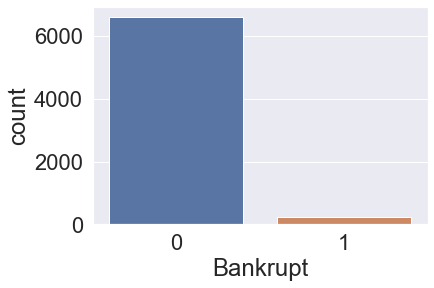

In [8]:
print(MainBankData[['Bankrupt']].value_counts())
sns.countplot(x='Bankrupt',data=MainBankData)

Lets look at the two categorial variables with respect to the bankrupt variable :

Let's see the relationship with bankrupt and the two categorial data in our data set. Net Income Flag which indicates that if a company is profitable for the past 2 years. 1 being non profitable and 0 being profitable a quick count plot shows there are no comapnies in our dataset that have been profitable for the past 2 years but that does not mean they are going to go bankrupt as out of all comapnies only a few went bankrupt. That means that this variable is not going to help us much in predicting bankruptcy and also indicates that not being profitable for the only last 2 years does not nessassily means the company will go bankrupt.

Net Income Flag  Bankrupt
1                0           6599
                 1            220
dtype: int64


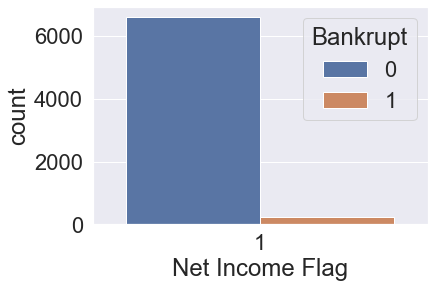

In [13]:
sns.countplot(x="Net Income Flag", hue="Bankrupt", data=MainBankData)
print(MainBankData[['Net Income Flag','Bankrupt']].value_counts())

The second categorial variable which is liability assests flag 0 stating that the companies assests are more than the companies liabilites and 1 being that the liabilites of a companies are more than its assests. Our dataset have most of the comapnies in the 0 category stating that most company are in the clear zone but still some companies went bankrupt and the companies which have liabilites more than there assets meaning in 1 category 80 percent of them went bankrupt accouring to our dataset. So there is some relation with bankruptcy of this categorial varible and will prove to be a good predictor for our model.

Liability-Assets Flag  Bankrupt
0                      0           6597
                       1            214
1                      1              6
                       0              2
dtype: int64


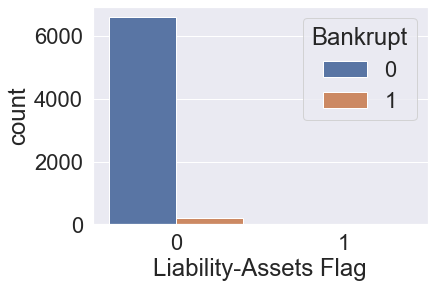

In [14]:
sns.countplot(x="Liability-Assets Flag", hue="Bankrupt", data=MainBankData)
print(MainBankData[['Liability-Assets Flag','Bankrupt']].value_counts())

Lets look at some graphs with Top predictors. First look at Some predictors with Postive Correlation meaning these features are important in making compnaies bankrupt :

Postive Correaltion : 

[Text(0.5, 1.0, 'Total expense/Assets  with Respect to Bankruptcy')]

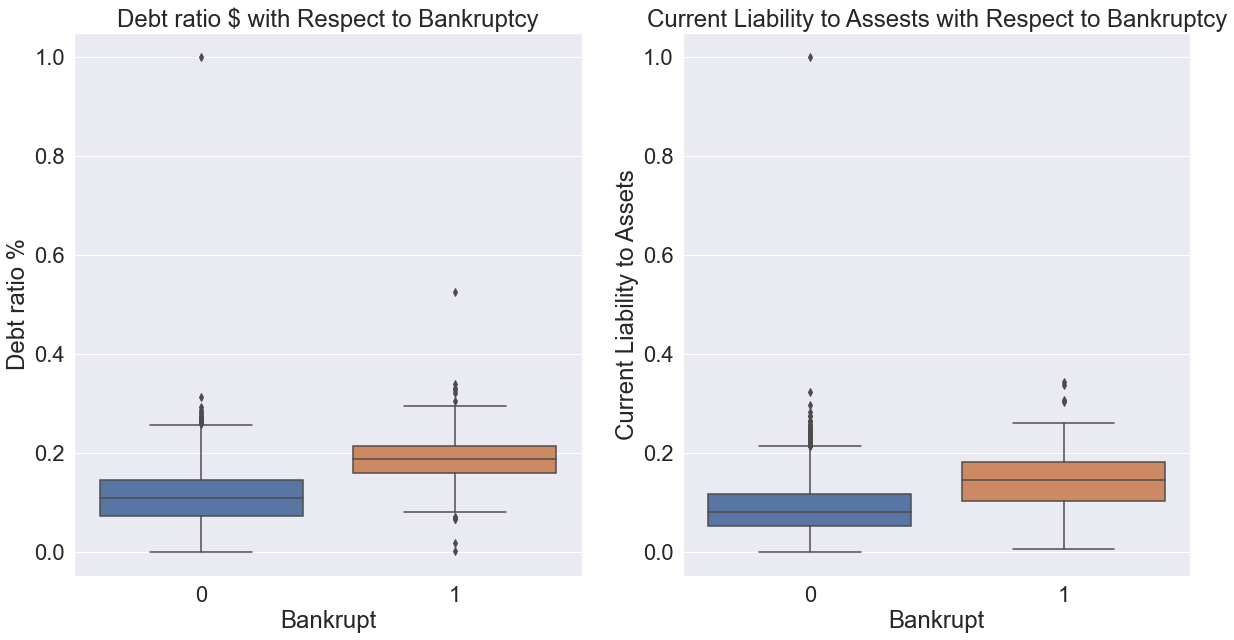

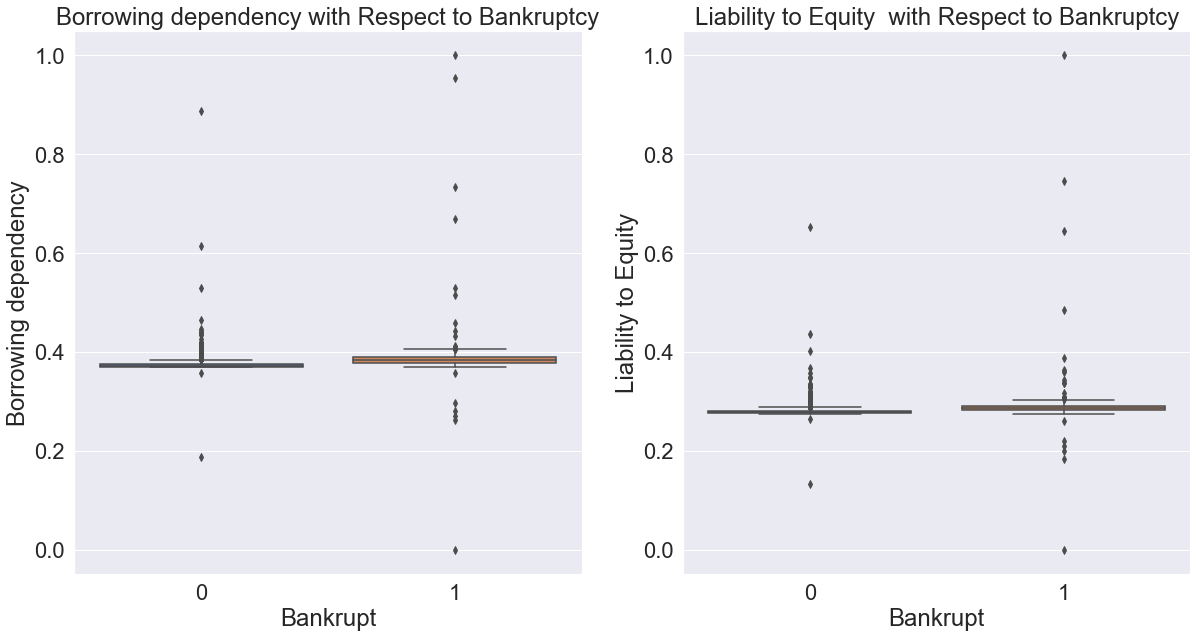

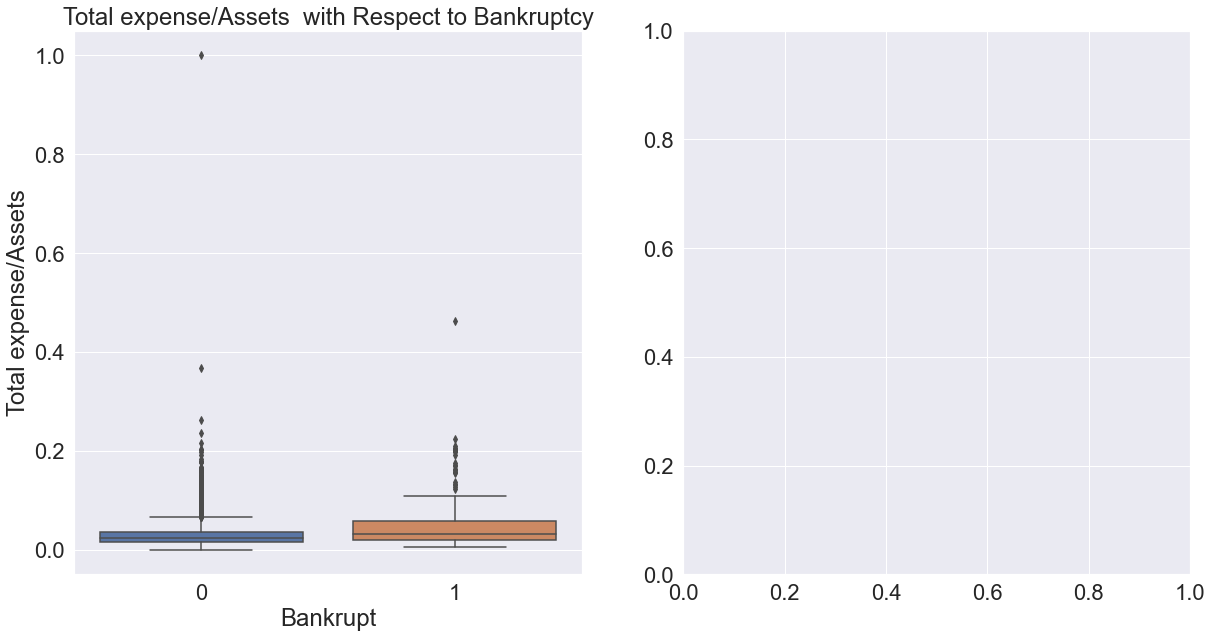

In [11]:
sns.set(font_scale=2)
f, axes = plt.subplots(ncols=2, figsize=(20,10))


sns.boxplot(x='Bankrupt', y="Debt ratio %", data=Top30Predictors,ax=axes[0]).set(title='Debt ratio $ with Respect to Bankruptcy')
sns.boxplot(x='Bankrupt', y="Current Liability to Assets", data=Top30Predictors,ax=axes[1]).set(title='Current Liability to Assests with Respect to Bankruptcy')

f, axes = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(x='Bankrupt', y="Borrowing dependency", data=Top30Predictors,ax=axes[0]).set(title='Borrowing dependency with Respect to Bankruptcy')
sns.boxplot(x='Bankrupt', y="Liability to Equity", data=Top30Predictors,ax=axes[1]).set(title='Liability to Equity  with Respect to Bankruptcy')

f, axes = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(x='Bankrupt', y="Total expense/Assets", data=Top30Predictors,ax=axes[0]).set(title='Total expense/Assets  with Respect to Bankruptcy')
#axes[1].set_visible(False)

# sns.boxplot(x='Bankrupt?', y=" Cash/Total Assets", data=Top30Predictors, ax=axes[1])
# axes[1].set_title('Bankrupt vs cash / total assets')


# sns.boxplot(x='Bankrupt?', y=" Current Liability to Assets", data=Top30Predictors, ax=axes[2])
# axes[2].set_title('Bankrupt vs current liability to assets')


# sns.boxplot(x='Bankrupt?', y=" Retained Earnings to Total Assets", Top30Predictors=bank_data, ax=axes[3])
# axes[3].set_title('Bankrupt vs  Retained Earnings to Total Assets')

# plt.show()

Lets explore some features that stop comapnies from going bankrupt

[Text(0.5, 1.0, 'Net profit before tax/Paid-in capital with Respect to Bankruptcy')]

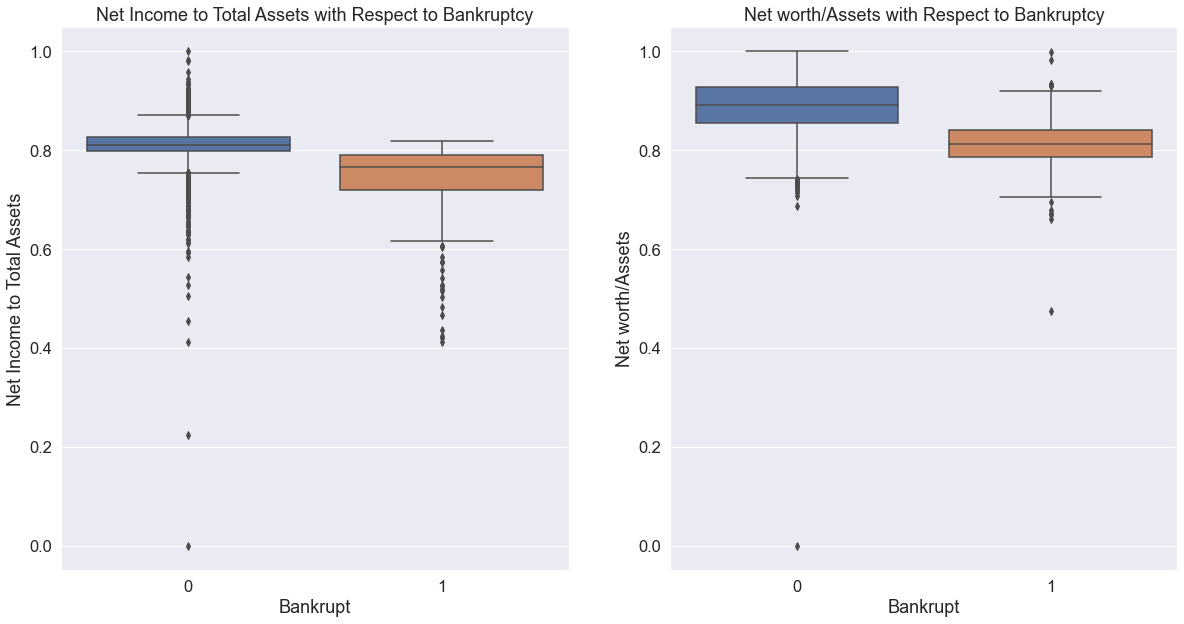

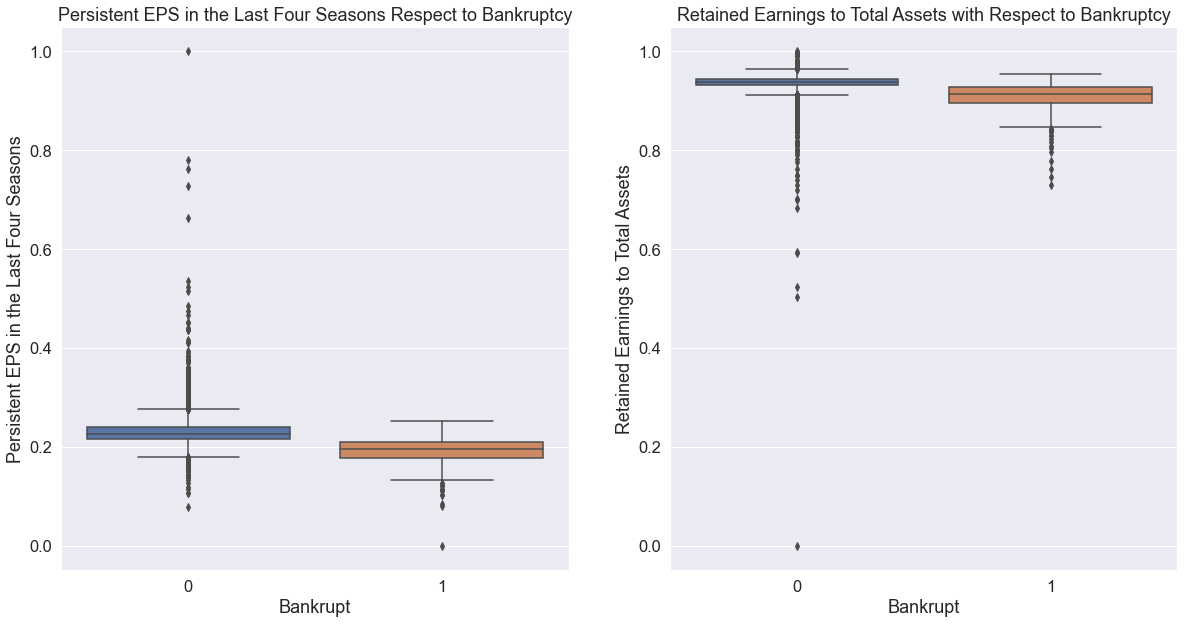

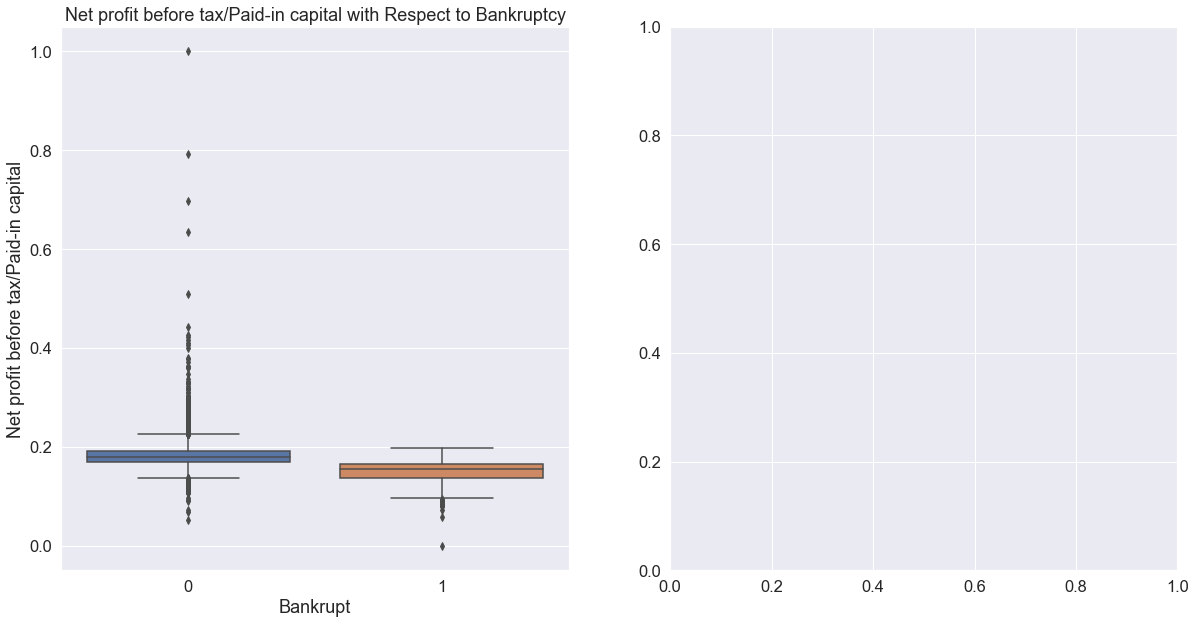

In [12]:
sns.set(font_scale=1.5)
f, axes = plt.subplots(ncols=2, figsize=(20,10))

sns.boxplot(x='Bankrupt', y="Net Income to Total Assets", data=Top30Predictors,ax=axes[0]).set(title='Net Income to Total Assets with Respect to Bankruptcy')
#sns.boxplot(x='Net Income to Total Assets', data=Top30Predictors,ax=axes[0]).set(title='Net Income to Total Assets with Respect to Bankruptcy')
sns.boxplot(x='Bankrupt', y="Net worth/Assets", data=Top30Predictors,ax=axes[1]).set(title='Net worth/Assets with Respect to Bankruptcy')

f, axes = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(x='Bankrupt', y="Persistent EPS in the Last Four Seasons", data=Top30Predictors,ax=axes[0]).set(title='Persistent EPS in the Last Four Seasons Respect to Bankruptcy')
sns.boxplot(x='Bankrupt', y="Retained Earnings to Total Assets", data=Top30Predictors,ax=axes[1]).set(title='Retained Earnings to Total Assets with Respect to Bankruptcy')

f, axes = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(x='Bankrupt', y="Net profit before tax/Paid-in capital", data=Top30Predictors,ax=axes[0]).set(title='Net profit before tax/Paid-in capital with Respect to Bankruptcy')
#axes[1].set_visible(False)

Lets Explore the Relationship between some Features :

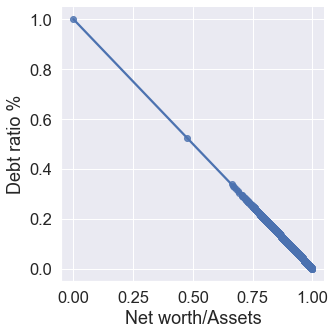

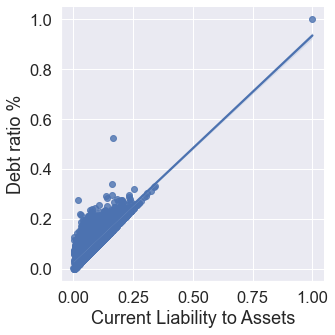

In [20]:
sns.lmplot(x='Net worth/Assets',y='Debt ratio %',data=Top30Predictors)
sns.lmplot(x='Current Liability to Assets',y='Debt ratio %',data=Top30Predictors)

Distributions of all the Top 30 predictors

array([[<AxesSubplot:title={'center':'Bankrupt'}>,
        <AxesSubplot:title={'center':'Net Income to Total Assets'}>,
        <AxesSubplot:title={'center':'ROA(A) before interest and % after tax'}>,
        <AxesSubplot:title={'center':'ROA(B) before interest and depreciation after tax'}>,
        <AxesSubplot:title={'center':'ROA(C) before interest and depreciation before interest'}>,
        <AxesSubplot:title={'center':'Net worth/Assets'}>],
       [<AxesSubplot:title={'center':'Debt ratio %'}>,
        <AxesSubplot:title={'center':'Persistent EPS in the Last Four Seasons'}>,
        <AxesSubplot:title={'center':'Retained Earnings to Total Assets'}>,
        <AxesSubplot:title={'center':'Net profit before tax/Paid-in capital'}>,
        <AxesSubplot:title={'center':'Per Share Net profit before tax (Yuan ¥)'}>,
        <AxesSubplot:title={'center':'Current Liability to Assets'}>],
       [<AxesSubplot:title={'center':'Working Capital to Total Assets'}>,
        <AxesSubplot:title={

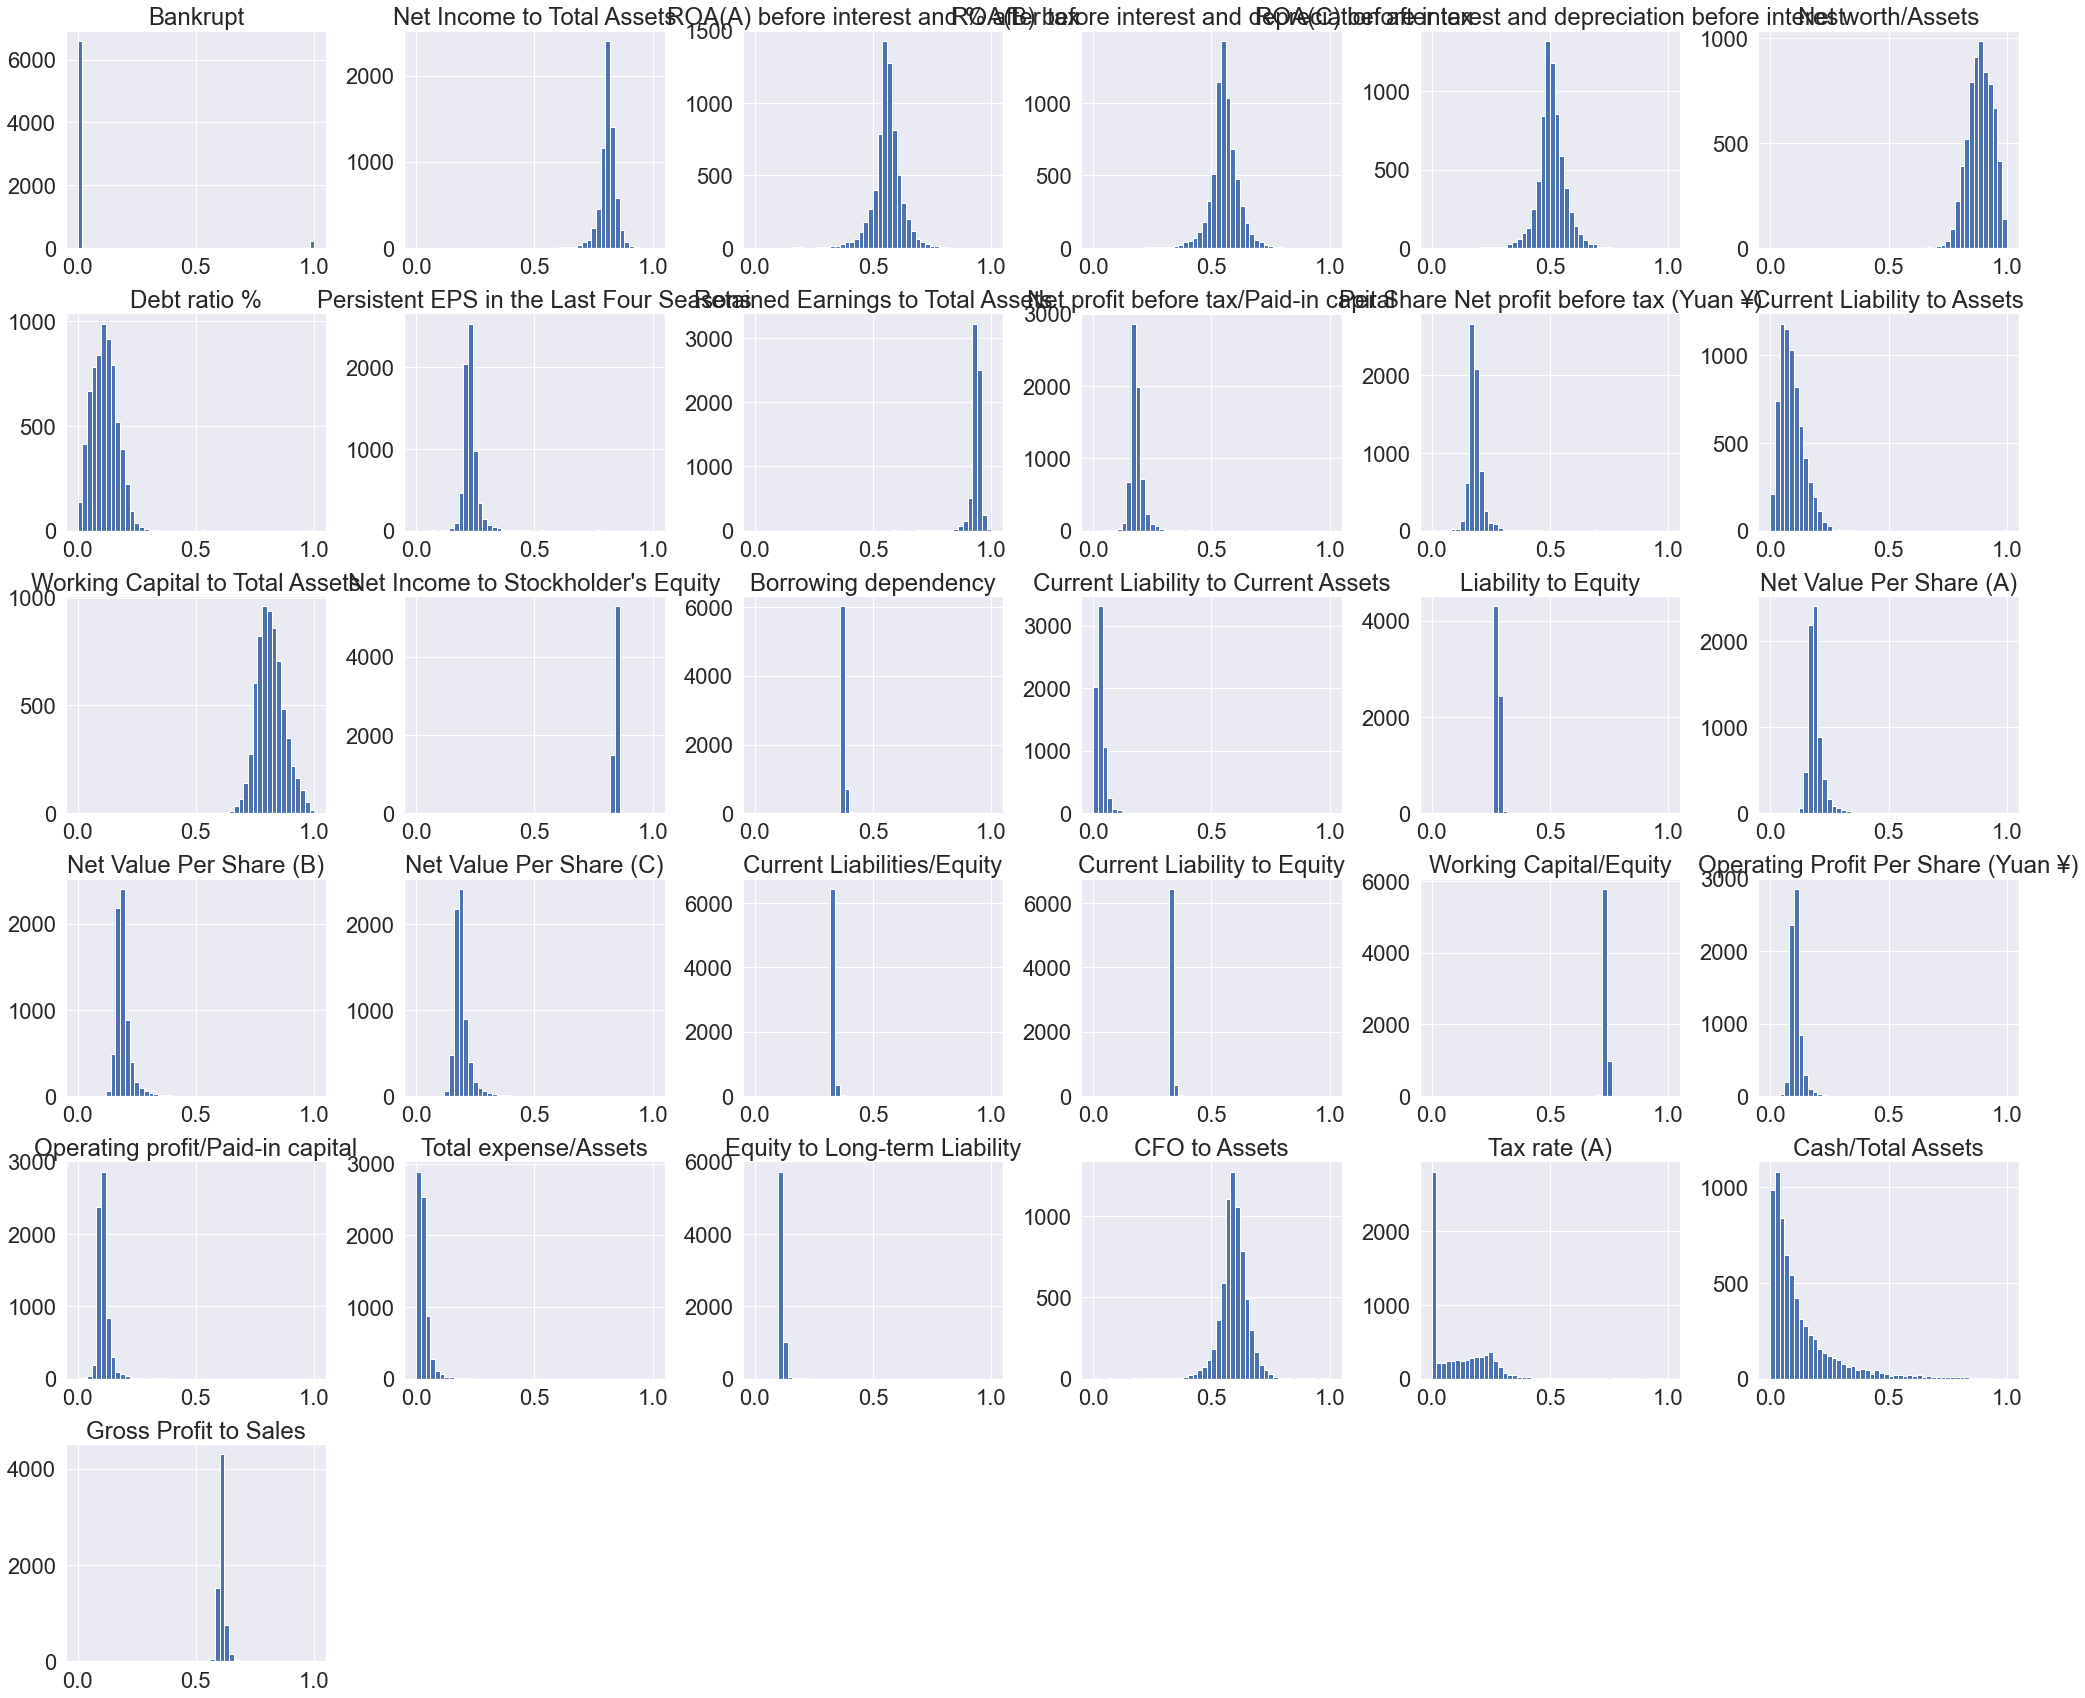

In [13]:
Top30Predictors.hist(figsize = (35,30), bins = 50)

Lets Remove Outliers from our Top 30 Predictors and Plot the Visualizations Again.

In [9]:
def RemoveOutliers(Column,ColumnName,Data):
    quantile25thPercent = Data[ColumnName].quantile(0.25)
    quantile75thPercent = Data[ColumnName].quantile(0.75)
    InterQuantileRange = quantile75thPercent - quantile25thPercent
    upper_limit = quantile75thPercent + 1.5 * InterQuantileRange
    lower_limit = quantile25thPercent - 1.5 * InterQuantileRange
    outliers = Data[(Data[ColumnName] > upper_limit) | (Data[ColumnName] < lower_limit)]
    newDataFrame = Data[(Data[ColumnName] <= upper_limit) & (Data[ColumnName] >= lower_limit)]
    print('Column Name : ' , ColumnName)
    print('Number of rows of New DataSet ',len(newDataFrame.index))
    print('Number of rows of Old DataSet ',len(Data.index))
    print('Outliers Removed ' , len(outliers))
    print('\n')
    return newDataFrame



In [10]:
Top30PredictorsORemoved = Top30Predictors.copy(deep=True)
for col in Top30PredictorsORemoved.columns[1:31]:
    Top30PredictorsORemoved = RemoveOutliers(col,str(col),Top30PredictorsORemoved)

Column Name :  Net Income to Total Assets
Number of rows of New DataSet  6258
Number of rows of Old DataSet  6819
Outliers Removed  561


Column Name :  ROA(A) before interest and % after tax
Number of rows of New DataSet  6113
Number of rows of Old DataSet  6258
Outliers Removed  145


Column Name :  ROA(B) before interest and depreciation after tax
Number of rows of New DataSet  6064
Number of rows of Old DataSet  6113
Outliers Removed  49


Column Name :  ROA(C) before interest and depreciation before interest
Number of rows of New DataSet  6035
Number of rows of Old DataSet  6064
Outliers Removed  29


Column Name :  Net worth/Assets
Number of rows of New DataSet  6027
Number of rows of Old DataSet  6035
Outliers Removed  8


Column Name :  Debt ratio %
Number of rows of New DataSet  6027
Number of rows of Old DataSet  6027
Outliers Removed  0


Column Name :  Persistent EPS in the Last Four Seasons
Number of rows of New DataSet  5775
Number of rows of Old DataSet  6027
Outliers Re

In [10]:
Top30PredictorsORemoved

,Bankrupt,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,...,Current Liability to Equity,Working Capital/Equity,Operating Profit Per Share (Yuan ¥),Operating profit/Paid-in capital,Total expense/Assets,Equity to Long-term Liability,CFO to Assets,Tax rate (A),Cash/Total Assets,Gross Profit to Sales
1,1,0.795297,0.538214,0.516730,0.464291,0.828824,0.171176,0.208944,0.931065,0.168962,...,0.329740,0.731975,0.093722,0.093743,0.025516,0.120916,0.567101,0.000000,0.014948,0.610237
7,0,0.815350,0.570922,0.559077,0.508361,0.891798,0.108202,0.225206,0.935449,0.179519,...,0.329804,0.734946,0.104796,0.104784,0.025482,0.114508,0.610091,0.157607,0.014616,0.601739
8,0,0.803647,0.545137,0.543284,0.488519,0.941409,0.058591,0.218398,0.935200,0.172159,...,0.328093,0.735182,0.095188,0.095209,0.029884,0.110933,0.574033,0.005871,0.145189,0.603613
9,0,0.804195,0.550916,0.542963,0.495686,0.878707,0.121293,0.217831,0.938290,0.175658,...,0.330409,0.737180,0.109844,0.109873,0.035891,0.115499,0.645146,0.392449,0.008773,0.599205
10,0,0.814111,0.567543,0.538198,0.482475,0.896423,0.103577,0.218966,0.942829,0.177611,...,0.327485,0.731959,0.096491,0.096471,0.028802,0.120943,0.574846,0.000000,0.002057,0.614021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6812,0,0.806743,0.549498,0.537877,0.491639,0.937540,0.062460,0.218682,0.934944,0.173780,...,0.328349,0.735320,0.099422,0.099443,0.057486,0.110938,0.569432,0.297803,0.088297,0.613219
6813,0,0.794028,0.531127,0.526099,0.477600,0.852919,0.147081,0.213293,0.930736,0.168554,...,0.331098,0.731959,0.088918,0.088882,0.015281,0.113811,0.587200,0.000000,0.053591,0.595827
6814,0,0.799927,0.539468,0.543230,0.493687,0.875382,0.124618,0.216602,0.925611,0.171111,...,0.330914,0.736716,0.098200,0.098222,0.019060,0.112622,0.587178,0.113372,0.099481,0.604455
6815,0,0.799748,0.538269,0.524172,0.475162,0.900747,0.099253,0.216697,0.932629,0.171805,...,0.329753,0.734584,0.098608,0.098572,0.011118,0.112329,0.569498,0.371596,0.080337,0.598306


BoxPlots of Predictors with Negative Correlation with Bankruptcy with Outliers Removed.

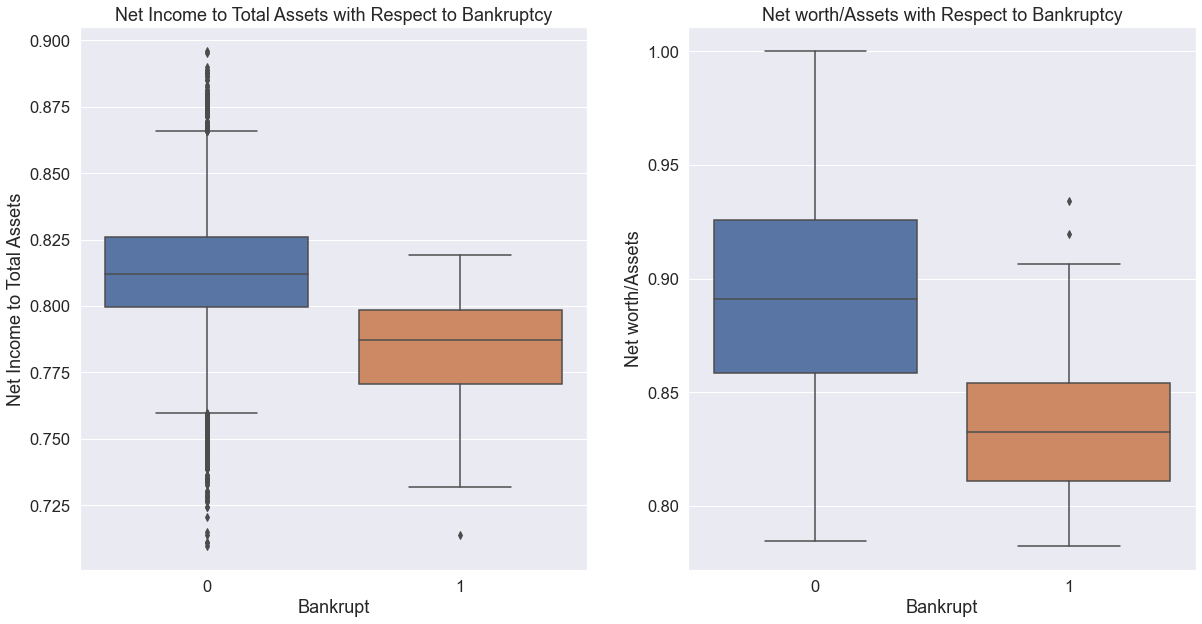

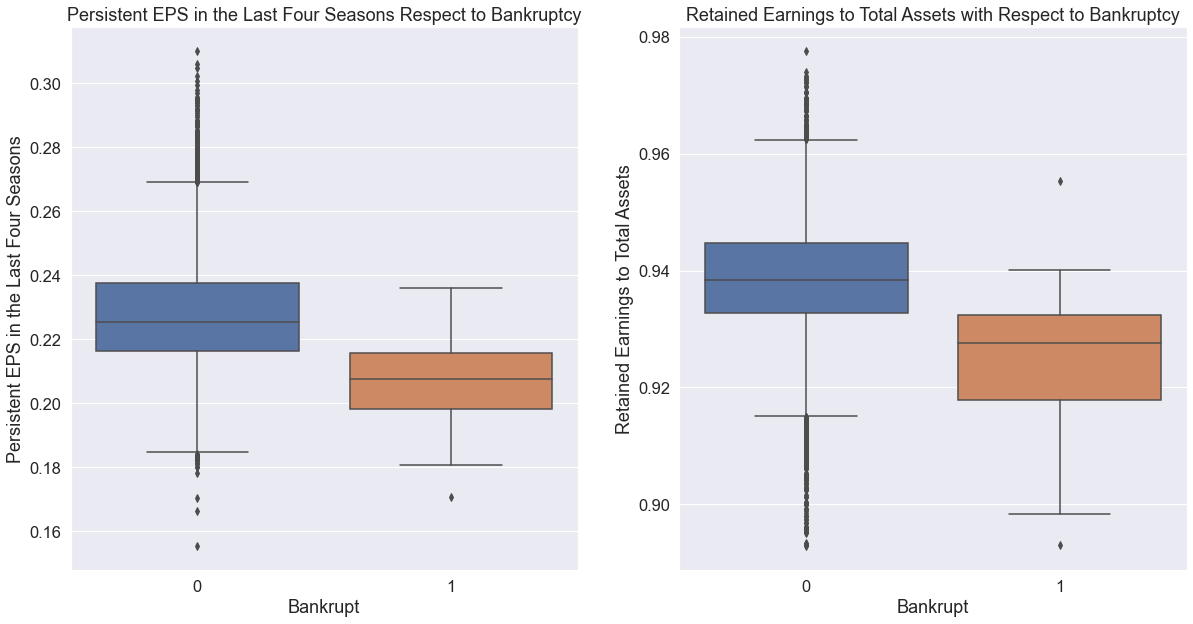

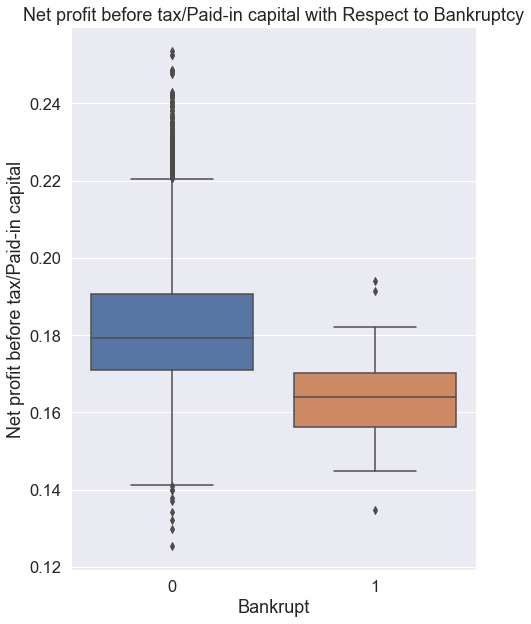

In [15]:
sns.set(font_scale=1.5)
f, axes = plt.subplots(ncols=2, figsize=(20,10))

sns.boxplot(x='Bankrupt', y="Net Income to Total Assets", data=Top30PredictorsORemoved,ax=axes[0]).set(title='Net Income to Total Assets with Respect to Bankruptcy')
sns.boxplot(x='Bankrupt', y="Net worth/Assets", data=Top30PredictorsORemoved,ax=axes[1]).set(title='Net worth/Assets with Respect to Bankruptcy')

f, axes = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(x='Bankrupt', y="Persistent EPS in the Last Four Seasons", data=Top30PredictorsORemoved,ax=axes[0]).set(title='Persistent EPS in the Last Four Seasons Respect to Bankruptcy')
sns.boxplot(x='Bankrupt', y="Retained Earnings to Total Assets", data=Top30PredictorsORemoved,ax=axes[1]).set(title='Retained Earnings to Total Assets with Respect to Bankruptcy')

f, axes = plt.subplots(ncols=2, figsize=(16,10))
sns.boxplot(x='Bankrupt', y="Net profit before tax/Paid-in capital", data=Top30PredictorsORemoved,ax=axes[0]).set(title='Net profit before tax/Paid-in capital with Respect to Bankruptcy')
axes[1].set_visible(False)

BoxPlots of Postive Correlation predictors with outliers removed

[Text(0.5, 1.0, 'Total expense/Assets  with Respect to Bankruptcy')]

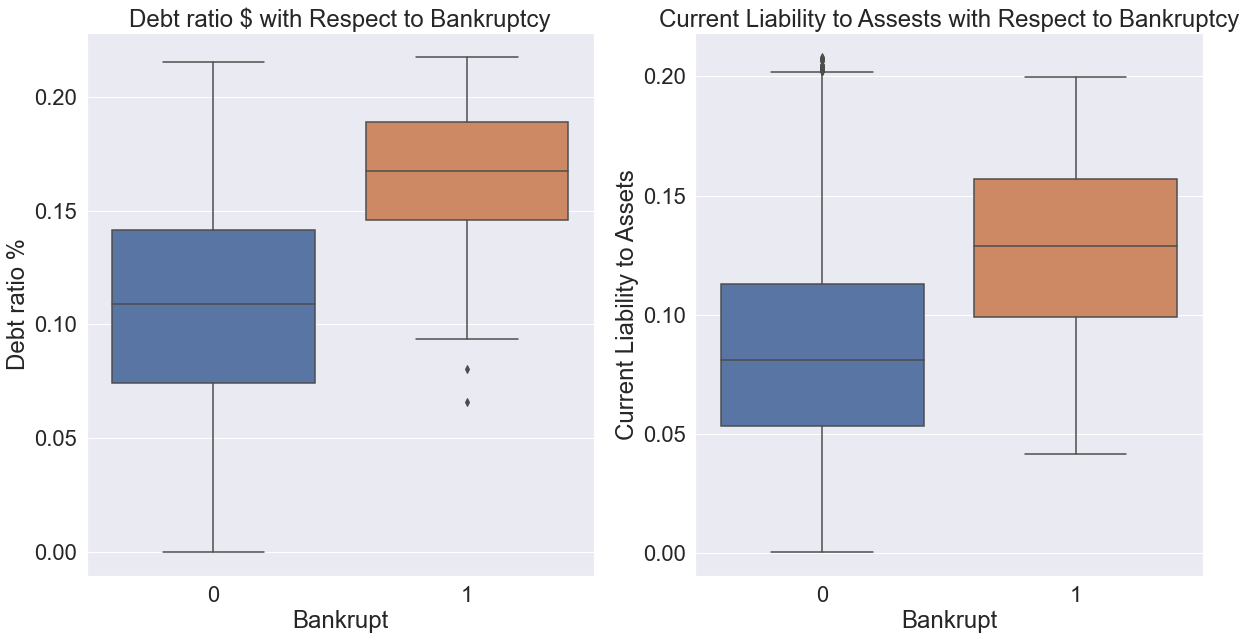

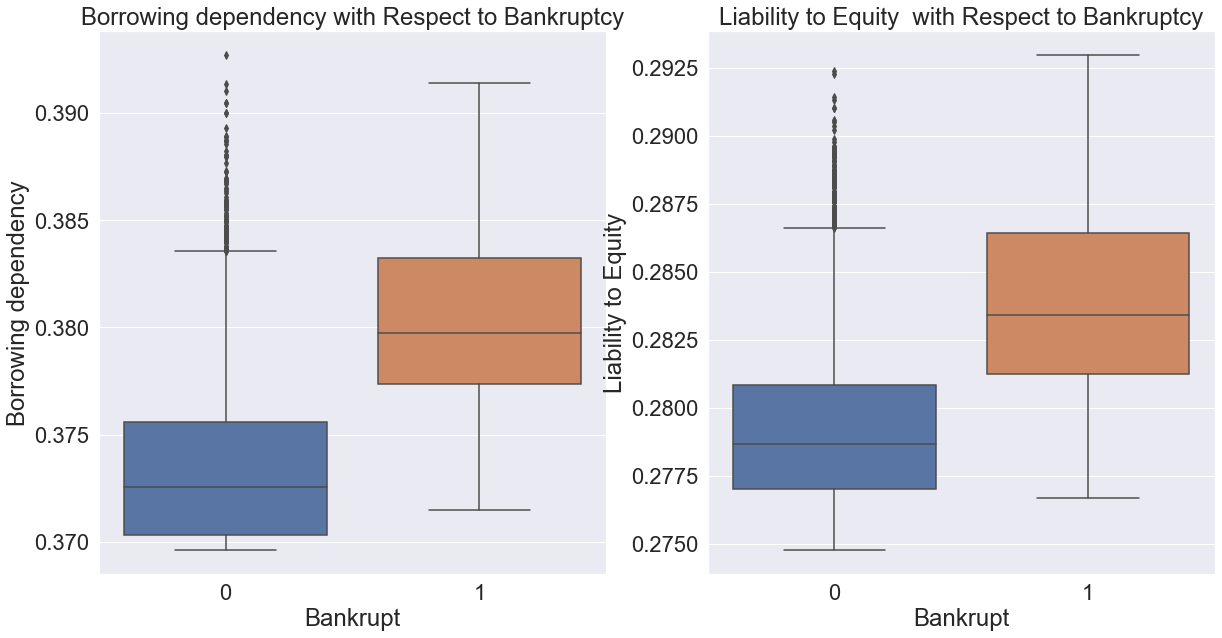

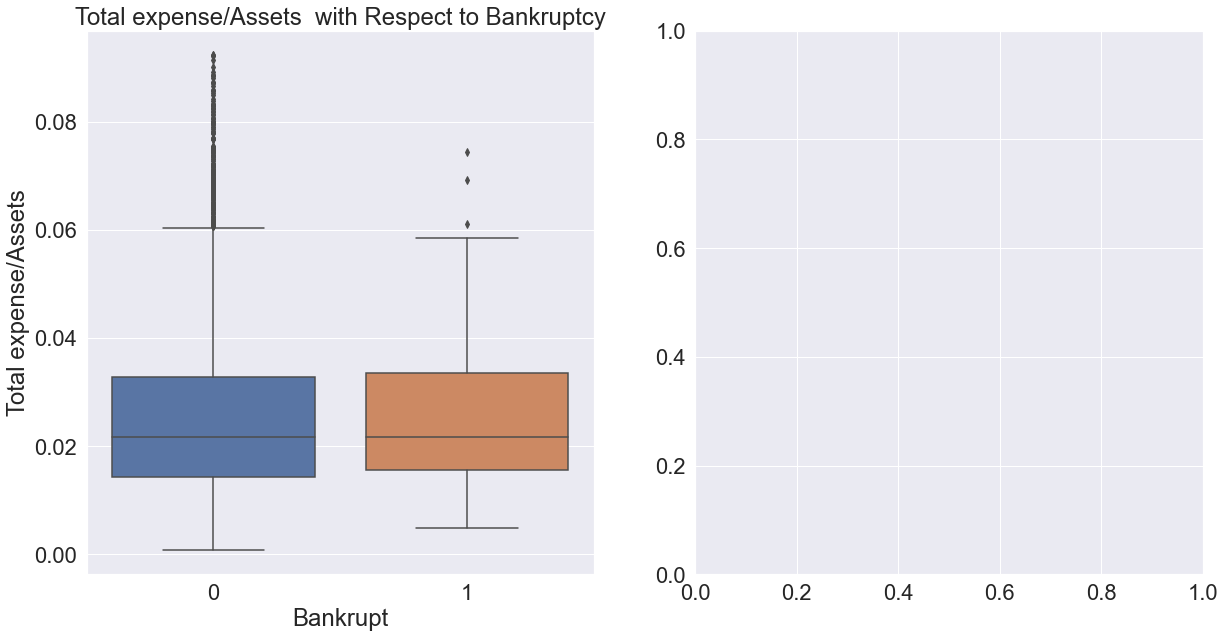

In [16]:
sns.set(font_scale=2)
f, axes = plt.subplots(ncols=2, figsize=(20,10))

sns.boxplot(x='Bankrupt', y="Debt ratio %", data=Top30PredictorsORemoved,ax=axes[0]).set(title='Debt ratio $ with Respect to Bankruptcy')
sns.boxplot(x='Bankrupt', y="Current Liability to Assets", data=Top30PredictorsORemoved,ax=axes[1]).set(title='Current Liability to Assests with Respect to Bankruptcy')

f, axes = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(x='Bankrupt', y="Borrowing dependency", data=Top30PredictorsORemoved,ax=axes[0]).set(title='Borrowing dependency with Respect to Bankruptcy')
sns.boxplot(x='Bankrupt', y="Liability to Equity", data=Top30PredictorsORemoved,ax=axes[1]).set(title='Liability to Equity  with Respect to Bankruptcy')

f, axes = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(x='Bankrupt', y="Total expense/Assets", data=Top30PredictorsORemoved,ax=axes[0]).set(title='Total expense/Assets  with Respect to Bankruptcy')
#axes[1].set_visible(False)

Relationship between features outliers removed

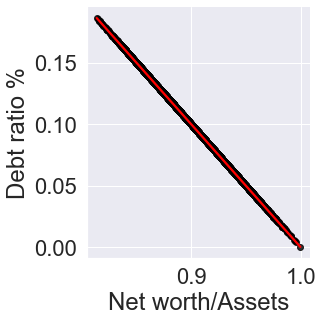

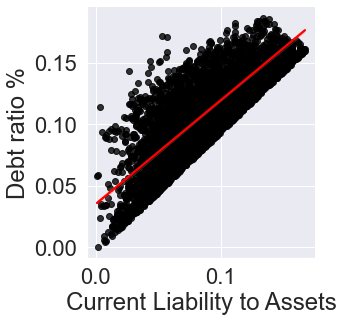

In [11]:
sns.lmplot(x='Net worth/Assets',y='Debt ratio %',data=Top30PredictorsORemoved,scatter_kws={"color": "black"}, line_kws={"color": "red"})
sns.lmplot(x='Current Liability to Assets',y='Debt ratio %',data=Top30PredictorsORemoved,scatter_kws={"color": "black"},line_kws={"color": "red"})

## Feature Selection

Going to remove all predictors which have correletion less than 0.1 with the target variable

In [10]:
CorrelationThreshold = 0.1
ColumNamesAboveCorrThreshold = CorrelationDataFrame[CorrelationDataFrame['Bankrupt'] > CorrelationThreshold].index
BestPredictors = MainBankData.loc[:,ColumNamesAboveCorrThreshold[1:]]
BestPredictors

,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan ¥),...,Working Capital/Equity,Operating Profit Per Share (Yuan ¥),Operating profit/Paid-in capital,Total expense/Assets,Equity to Long-term Liability,CFO to Assets,Tax rate (A),Cash/Total Assets,Gross Profit to Sales,Operating Gross Margin
0,0.716845,0.424389,0.405750,0.370594,0.792424,0.207576,0.169141,0.903225,0.137757,0.138736,...,0.721275,0.095921,0.095885,0.064856,0.126549,0.520382,0.000000,0.004094,0.601453,0.601457
1,0.795297,0.538214,0.516730,0.464291,0.828824,0.171176,0.208944,0.931065,0.168962,0.169918,...,0.731975,0.093722,0.093743,0.025516,0.120916,0.567101,0.000000,0.014948,0.610237,0.610235
2,0.774670,0.499019,0.472295,0.426071,0.792484,0.207516,0.180581,0.909903,0.148036,0.142803,...,0.742729,0.092338,0.092318,0.021387,0.117922,0.538491,0.000000,0.000991,0.601449,0.601450
3,0.739555,0.451265,0.457733,0.399844,0.848535,0.151465,0.193722,0.906902,0.147561,0.148603,...,0.729825,0.077762,0.077727,0.024161,0.120760,0.604105,0.000000,0.018851,0.583538,0.583541
4,0.795016,0.538432,0.522298,0.465022,0.893491,0.106509,0.212537,0.913850,0.167461,0.168412,...,0.732000,0.096898,0.096927,0.026385,0.110933,0.578469,0.000000,0.014161,0.598782,0.598783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.799927,0.539468,0.543230,0.493687,0.875382,0.124618,0.216602,0.925611,0.171111,0.172102,...,0.736716,0.098200,0.098222,0.019060,0.112622,0.587178,0.113372,0.099481,0.604455,0.604455
6815,0.799748,0.538269,0.524172,0.475162,0.900747,0.099253,0.216697,0.932629,0.171805,0.172780,...,0.734584,0.098608,0.098572,0.011118,0.112329,0.569498,0.371596,0.080337,0.598306,0.598308
6816,0.797778,0.533744,0.520638,0.472725,0.961061,0.038939,0.210929,0.932000,0.172287,0.173232,...,0.737432,0.100073,0.100103,0.035446,0.110933,0.589341,0.490839,0.412885,0.610441,0.610444
6817,0.811808,0.559911,0.554045,0.506264,0.913021,0.086979,0.228326,0.939613,0.182498,0.185584,...,0.736713,0.111799,0.111722,0.016443,0.110957,0.678338,0.181294,0.112238,0.607846,0.607850


Checking correlation between top predictors and removing correlated features.

In [11]:
CorrelationBestPredcitors = BestPredictors.corr()
CorrelationBestPredcitors

,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan ¥),...,Working Capital/Equity,Operating Profit Per Share (Yuan ¥),Operating profit/Paid-in capital,Total expense/Assets,Equity to Long-term Liability,CFO to Assets,Tax rate (A),Cash/Total Assets,Gross Profit to Sales,Operating Gross Margin
Net Income to Total Assets,1.000000,0.961552,0.912040,0.887670,0.281422,-0.281422,0.691152,0.794189,0.683623,0.671748,...,0.123817,0.577846,0.575833,-0.470498,-0.120242,0.440095,0.231210,0.195652,0.300146,0.300143
ROA(A) before interest and % after tax,0.961552,1.000000,0.955741,0.940124,0.259972,-0.259972,0.764828,0.718013,0.758234,0.752578,...,0.120403,0.654253,0.651581,-0.357147,-0.103015,0.443017,0.225897,0.217918,0.326971,0.326969
ROA(B) before interest and depreciation after tax,0.912040,0.955741,1.000000,0.986849,0.264734,-0.264734,0.764597,0.673738,0.726003,0.722940,...,0.101962,0.659834,0.657274,-0.322223,-0.083190,0.497042,0.197344,0.227144,0.333750,0.333749
ROA(C) before interest and depreciation before interest,0.887670,0.940124,0.986849,1.000000,0.261427,-0.261427,0.775006,0.650217,0.753339,0.750564,...,0.103819,0.687201,0.685028,-0.296019,-0.086535,0.504311,0.250761,0.235314,0.334721,0.334719
Net worth/Assets,0.281422,0.259972,0.264734,0.261427,1.000000,-1.000000,0.177429,0.235423,0.164110,0.158897,...,0.105008,0.078056,0.077250,-0.037513,-0.244974,0.268159,0.009724,0.357605,0.245461,0.245460
Debt ratio %,-0.281422,-0.259972,-0.264734,-0.261427,-1.000000,1.000000,-0.177429,-0.235423,-0.164110,-0.158897,...,-0.105008,-0.078056,-0.077250,0.037513,0.244974,-0.268159,-0.009724,-0.357605,-0.245461,-0.245460
Persistent EPS in the Last Four Seasons,0.691152,0.764828,0.764597,0.775006,0.177429,-0.177429,1.000000,0.492078,0.959461,0.955591,...,0.121854,0.876769,0.873641,-0.177996,-0.114381,0.333636,0.169345,0.240956,0.256723,0.256722
Retained Earnings to Total Assets,0.794189,0.718013,0.673738,0.650217,0.235423,-0.235423,0.492078,1.000000,0.483355,0.473736,...,0.076849,0.415226,0.413869,-0.541559,-0.073713,0.371488,0.212204,0.096487,0.164583,0.164579
Net profit before tax/Paid-in capital,0.683623,0.758234,0.726003,0.753339,0.164110,-0.164110,0.959461,0.483355,1.000000,0.962723,...,0.115605,0.886157,0.887370,-0.174815,-0.111974,0.318991,0.209898,0.228365,0.248106,0.248104
Per Share Net profit before tax (Yuan ¥),0.671748,0.752578,0.722940,0.750564,0.158897,-0.158897,0.955591,0.473736,0.962723,1.000000,...,0.114848,0.861813,0.858310,-0.156954,-0.110478,0.308200,0.208763,0.222925,0.247791,0.247789


Going to remove all predictors with correlation greater than 0.8 with each other.

In [12]:
correlated_features = set()
for i in range(len(CorrelationBestPredcitors .columns)):
    for j in range(i):
        if abs(CorrelationBestPredcitors.iloc[i, j]) > 0.8:
            colname = CorrelationBestPredcitors.columns[i]
            correlated_features.add(colname)

In [13]:
correlated_features

{'Borrowing dependency',
 'Current Liabilities/Equity',
 'Current Liability to Assets',
 'Current Liability to Equity',
 'Debt ratio %',
 'Equity to Long-term Liability',
 'Liability to Equity',
 'Net Value Per Share (B)',
 'Net Value Per Share (C)',
 'Net profit before tax/Paid-in capital',
 'Operating Gross Margin',
 'Operating Profit Per Share (Yuan ¥)',
 'Operating profit/Paid-in capital',
 'Per Share Net profit before tax (Yuan ¥)',
 'ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'ROA(C) before interest and depreciation before interest'}

In [14]:
BestpredictorsCorrelationRemoved = BestPredictors.drop(correlated_features,axis=1)
BestpredictorsCorrelationRemoved.columns

Index(['Net Income to Total Assets', 'Net worth/Assets',
       'Persistent EPS in the Last Four Seasons',
       'Retained Earnings to Total Assets', 'Working Capital to Total Assets',
       'Net Income to Stockholder's Equity',
       'Current Liability to Current Assets', 'Net Value Per Share (A)',
       'Working Capital/Equity', 'Total expense/Assets', 'CFO to Assets',
       'Tax rate (A)', 'Cash/Total Assets', 'Gross Profit to Sales'],
      dtype='object')

Trying an automated feature selection tool from sklearn

In [15]:
fs = SelectKBest(score_func=f_classif, k=15)
labels = MainBankData['Bankrupt']
predictors = MainBankData.copy(deep=True)
predictors.drop(['Bankrupt','Net Income Flag','Liability-Assets Flag'], axis = 1,inplace=True)
fs.fit_transform(predictors,labels)
Autoselectedcols = fs.get_support(indices=True)
AutoselectedColumns = MainBankData.iloc[:,Autoselectedcols]
AutoselectedColumns = AutoselectedColumns.iloc[:,1:]
AutoselectedColumns.columns

Index(['ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax', 'Net Value Per Share (C)',
       'Operating Profit Per Share (Yuan ¥)', 'Total debt/Total net worth',
       'Debt ratio %', 'Long-term fund suitability ratio (A)',
       'Operating profit/Paid-in capital', 'Allocation rate per person',
       'Cash/Current Liability', 'Long-term Liability to Current Assets',
       'Cash Flow to Equity', 'Current Liability to Current Assets',
       'No-credit Interval'],
      dtype='object')

## Data Transformation.

Log Transformation Function to be Used :

In [16]:
def PerformLogarithmicTransformation(Data):
    for col in Data.columns:
        Data[col] =  np.log10(Data[col])
    return Data

We are going to perform log transformation on the fourteen predictors that are left to make there shape more normally distributed

In [17]:
TransformedDataset = BestpredictorsCorrelationRemoved.copy(deep=True)
TransformedDataset

,Net Income to Total Assets,Net worth/Assets,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Working Capital to Total Assets,Net Income to Stockholder's Equity,Current Liability to Current Assets,Net Value Per Share (A),Working Capital/Equity,Total expense/Assets,CFO to Assets,Tax rate (A),Cash/Total Assets,Gross Profit to Sales
0,0.716845,0.792424,0.169141,0.903225,0.672775,0.827890,0.118250,0.147950,0.721275,0.064856,0.520382,0.000000,0.004094,0.601453
1,0.795297,0.828824,0.208944,0.931065,0.751111,0.839969,0.047775,0.182251,0.731975,0.025516,0.567101,0.000000,0.014948,0.610237
2,0.774670,0.792484,0.180581,0.909903,0.829502,0.836774,0.025346,0.177911,0.742729,0.021387,0.538491,0.000000,0.000991,0.601449
3,0.739555,0.848535,0.193722,0.906902,0.725754,0.834697,0.067250,0.154187,0.729825,0.024161,0.604105,0.000000,0.018851,0.583538
4,0.795016,0.893491,0.212537,0.913850,0.751822,0.839973,0.047725,0.167502,0.732000,0.026385,0.578469,0.000000,0.014161,0.598782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.799927,0.875382,0.216602,0.925611,0.817769,0.840359,0.027951,0.175045,0.736716,0.019060,0.587178,0.113372,0.099481,0.604455
6815,0.799748,0.900747,0.216697,0.932629,0.793387,0.840306,0.031470,0.181324,0.734584,0.011118,0.569498,0.371596,0.080337,0.598306
6816,0.797778,0.961061,0.210929,0.932000,0.866047,0.840138,0.007542,0.269521,0.737432,0.035446,0.589341,0.490839,0.412885,0.610441
6817,0.811808,0.913021,0.228326,0.939613,0.832340,0.841084,0.022916,0.213392,0.736713,0.016443,0.678338,0.181294,0.112238,0.607846


In [18]:
PerformLogarithmicTransformation(TransformedDataset)

,Net Income to Total Assets,Net worth/Assets,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Working Capital to Total Assets,Net Income to Stockholder's Equity,Current Liability to Current Assets,Net Value Per Share (A),Working Capital/Equity,Total expense/Assets,CFO to Assets,Tax rate (A),Cash/Total Assets,Gross Profit to Sales
0,-0.144575,-0.101043,-0.771752,-0.044204,-0.172130,-0.082027,-0.927197,-0.829885,-0.141899,-1.188052,-0.283678,-inf,-2.387809,-0.220798
1,-0.099471,-0.081538,-0.679970,-0.031020,-0.124296,-0.075737,-1.320797,-0.739330,-0.135504,-1.593190,-0.246339,-inf,-1.825425,-0.214502
2,-0.110883,-0.101009,-0.743329,-0.041005,-0.081183,-0.077392,-1.596082,-0.749798,-0.129170,-1.669841,-0.268822,-inf,-3.003951,-0.220801
3,-0.131030,-0.071330,-0.712821,-0.042440,-0.139210,-0.078471,-1.172310,-0.811954,-0.136781,-1.616884,-0.218888,-inf,-1.724674,-0.233931
4,-0.099624,-0.048910,-0.672566,-0.039125,-0.123885,-0.075735,-1.321251,-0.775979,-0.135489,-1.578639,-0.237720,-inf,-1.848907,-0.222732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-0.096950,-0.057803,-0.664337,-0.033572,-0.087369,-0.075535,-1.553608,-0.756850,-0.132700,-1.719885,-0.231230,-0.945495,-1.002261,-0.218636
6815,-0.097047,-0.045397,-0.664148,-0.030291,-0.100515,-0.075563,-1.502104,-0.741545,-0.133958,-1.953969,-0.244508,-0.429929,-1.095083,-0.223077
6816,-0.098118,-0.017249,-0.675863,-0.030584,-0.062459,-0.075649,-2.122487,-0.569408,-0.132278,-1.450433,-0.229633,-0.309061,-0.384171,-0.214357
6817,-0.090547,-0.039519,-0.641445,-0.027051,-0.079699,-0.075161,-1.639853,-0.670822,-0.132702,-1.784026,-0.168554,-0.741617,-0.949859,-0.216206


In [19]:
TransformedDataset[TransformedDataset == -inf] = 0

In [20]:
TransformedDataset

,Net Income to Total Assets,Net worth/Assets,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Working Capital to Total Assets,Net Income to Stockholder's Equity,Current Liability to Current Assets,Net Value Per Share (A),Working Capital/Equity,Total expense/Assets,CFO to Assets,Tax rate (A),Cash/Total Assets,Gross Profit to Sales
0,-0.144575,-0.101043,-0.771752,-0.044204,-0.172130,-0.082027,-0.927197,-0.829885,-0.141899,-1.188052,-0.283678,0.000000,-2.387809,-0.220798
1,-0.099471,-0.081538,-0.679970,-0.031020,-0.124296,-0.075737,-1.320797,-0.739330,-0.135504,-1.593190,-0.246339,0.000000,-1.825425,-0.214502
2,-0.110883,-0.101009,-0.743329,-0.041005,-0.081183,-0.077392,-1.596082,-0.749798,-0.129170,-1.669841,-0.268822,0.000000,-3.003951,-0.220801
3,-0.131030,-0.071330,-0.712821,-0.042440,-0.139210,-0.078471,-1.172310,-0.811954,-0.136781,-1.616884,-0.218888,0.000000,-1.724674,-0.233931
4,-0.099624,-0.048910,-0.672566,-0.039125,-0.123885,-0.075735,-1.321251,-0.775979,-0.135489,-1.578639,-0.237720,0.000000,-1.848907,-0.222732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-0.096950,-0.057803,-0.664337,-0.033572,-0.087369,-0.075535,-1.553608,-0.756850,-0.132700,-1.719885,-0.231230,-0.945495,-1.002261,-0.218636
6815,-0.097047,-0.045397,-0.664148,-0.030291,-0.100515,-0.075563,-1.502104,-0.741545,-0.133958,-1.953969,-0.244508,-0.429929,-1.095083,-0.223077
6816,-0.098118,-0.017249,-0.675863,-0.030584,-0.062459,-0.075649,-2.122487,-0.569408,-0.132278,-1.450433,-0.229633,-0.309061,-0.384171,-0.214357
6817,-0.090547,-0.039519,-0.641445,-0.027051,-0.079699,-0.075161,-1.639853,-0.670822,-0.132702,-1.784026,-0.168554,-0.741617,-0.949859,-0.216206


array([[<AxesSubplot:title={'center':'Net Income to Total Assets'}>,
        <AxesSubplot:title={'center':'Net worth/Assets'}>,
        <AxesSubplot:title={'center':'Persistent EPS in the Last Four Seasons'}>,
        <AxesSubplot:title={'center':'Retained Earnings to Total Assets'}>],
       [<AxesSubplot:title={'center':'Working Capital to Total Assets'}>,
        <AxesSubplot:title={'center':"Net Income to Stockholder's Equity"}>,
        <AxesSubplot:title={'center':'Current Liability to Current Assets'}>,
        <AxesSubplot:title={'center':'Net Value Per Share (A)'}>],
       [<AxesSubplot:title={'center':'Working Capital/Equity'}>,
        <AxesSubplot:title={'center':'Total expense/Assets'}>,
        <AxesSubplot:title={'center':'CFO to Assets'}>,
        <AxesSubplot:title={'center':'Tax rate (A)'}>],
       [<AxesSubplot:title={'center':'Cash/Total Assets'}>,
        <AxesSubplot:title={'center':'Gross Profit to Sales'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=objec

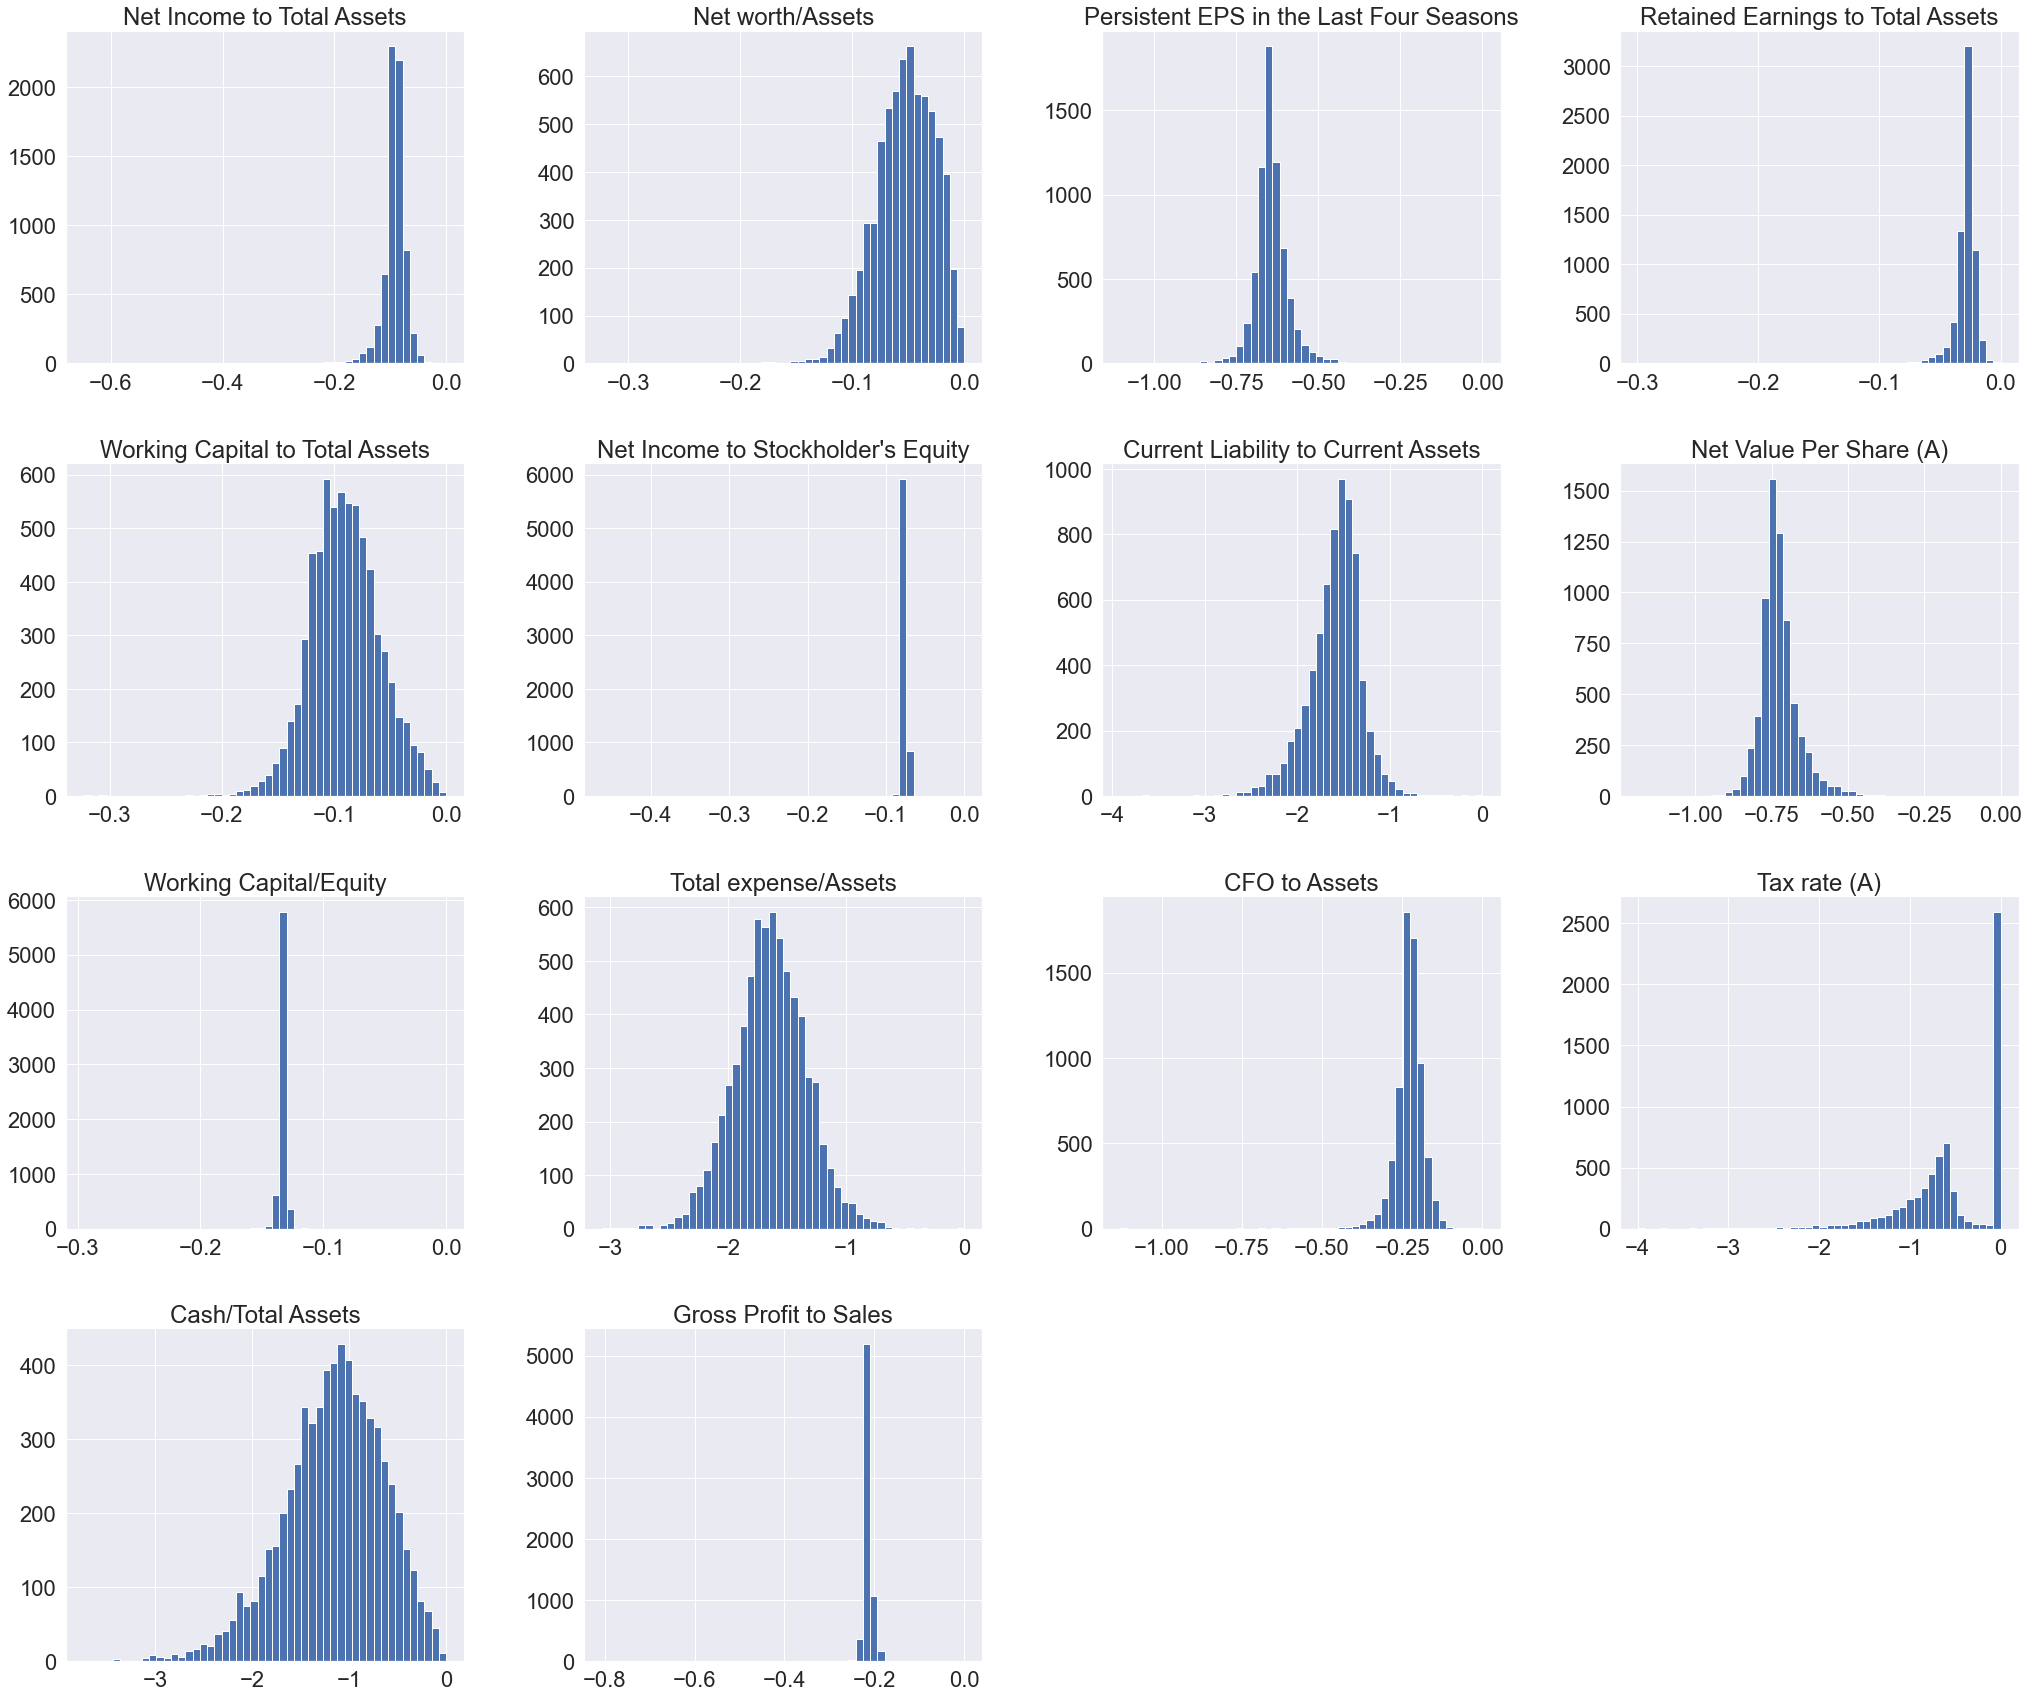

In [21]:
TransformedDataset.hist(figsize = (35,30), bins = 50)

## Modeling / Machine Learning

Seperating the target variable and the predictors to start the machine learning process.

In [23]:
labels = MainBankData['Bankrupt']
predictors = TransformedDataset.copy(deep=True)
predictors.head()

,Net Income to Total Assets,Net worth/Assets,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Working Capital to Total Assets,Net Income to Stockholder's Equity,Current Liability to Current Assets,Net Value Per Share (A),Working Capital/Equity,Total expense/Assets,CFO to Assets,Tax rate (A),Cash/Total Assets,Gross Profit to Sales
0,-0.144575,-0.101043,-0.771752,-0.044204,-0.172130,-0.082027,-0.927197,-0.829885,-0.141899,-1.188052,-0.283678,0.0,-2.387809,-0.220798
1,-0.099471,-0.081538,-0.679970,-0.031020,-0.124296,-0.075737,-1.320797,-0.739330,-0.135504,-1.593190,-0.246339,0.0,-1.825425,-0.214502
2,-0.110883,-0.101009,-0.743329,-0.041005,-0.081183,-0.077392,-1.596082,-0.749798,-0.129170,-1.669841,-0.268822,0.0,-3.003951,-0.220801
3,-0.131030,-0.071330,-0.712821,-0.042440,-0.139210,-0.078471,-1.172310,-0.811954,-0.136781,-1.616884,-0.218888,0.0,-1.724674,-0.233931
4,-0.099624,-0.048910,-0.672566,-0.039125,-0.123885,-0.075735,-1.321251,-0.775979,-0.135489,-1.578639,-0.237720,0.0,-1.848907,-0.222732


I am going to be performing the split twice to get 6 variables 2 varaibles for train 2 for validation and 2 for final testing.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(predictors, 
                                                    labels, test_size=0.10, 
                                                    random_state=30)

X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                    y_train, test_size=0.20, 
                                                    random_state=30)

print(len(y_test))
print(y_test.value_counts())
print(len(y_val))
print(y_val.value_counts())

682
0    658
1     24
Name: Bankrupt, dtype: int64
1228
0    1193
1      35
Name: Bankrupt, dtype: int64


## Scaling the Train , Validation and Test data.

In [25]:
Scaler = preprocessing.StandardScaler()
numericcolumns = X_train.dtypes[X_train.dtypes != 'int64'].index
X_train[numericcolumns] = Scaler.fit_transform(X_train[numericcolumns].values)
X_val[numericcolumns] = Scaler.transform(X_val[numericcolumns].values)
X_test[numericcolumns] = Scaler.transform(X_test[numericcolumns].values)


X_train[numericcolumns] = X_train[numericcolumns].fillna(0)
X_val[numericcolumns] = X_val[numericcolumns].fillna(0)
X_test[numericcolumns] = X_test[numericcolumns].fillna(0)

## Starting Machine Learning

Creating a Machine Learning Function which will take in a model and it's parameters do RandomSearchCV with Stratified 5-Kfolds to give us the best parameters for the model. Anothe print function was also created to print and store the results of the best model on the validation set.

In [26]:
ValidationTestResults = pd.DataFrame(columns=['Model Name','Precision','Recall','F1 score','ROC-AUC score',
                                              'False Positive Rate','True Positive Rate','Threshold'])

CrossValidationResults = pd.DataFrame(columns=['Model Name','Precision Score','Recall Score','F1 Score','BestParameters'])

def MachineLearningFunction(X_train,y_train,Model,parameters,KfoldValue,ModelName):
    RandomSearchObject = RandomizedSearchCV(Model, parameters,n_iter=4)
    TotalPrecisionScore = 0
    TotalRecallScore = 0
    TotalF1Score = 0
    MaxF1Score = 0
    BestOverAllModel = Model
    Kfolds = StratifiedKFold(n_splits=KfoldValue, shuffle=False)
    
    for trainfold, testfold in Kfolds.split(X_train, y_train):
        pipelinefold = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'),RandomSearchObject)
        Model = pipelinefold.fit(X_train.iloc[trainfold], y_train.iloc[trainfold])
        BestModel = RandomSearchObject.best_estimator_
        PredictedValues = BestModel.predict(X_train.iloc[testfold])

        TotalPrecisionScore = TotalPrecisionScore + precision_score(y_train.iloc[testfold], PredictedValues)
        TotalRecallScore = TotalRecallScore + recall_score(y_train.iloc[testfold], PredictedValues)
        TotalF1Score = TotalF1Score + f1_score(y_train.iloc[testfold], PredictedValues)
    
        if f1_score(y_train.iloc[testfold], PredictedValues) > MaxF1Score:
            MaxF1Score = f1_score(y_train.iloc[testfold], PredictedValues)
            BestOverAllModel = BestModel
    
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    sm_X_Train,sm_Y_Train = sm.fit_resample(X_train, y_train)
    
    BestOverAllModel = BestOverAllModel.fit(sm_X_Train, sm_Y_Train)
            
    AveragePrecisionScore = round(TotalPrecisionScore/KfoldValue,2)
    AverageRecallSCore = round(TotalRecallScore/KfoldValue,2)
    AverageF1Score = round(TotalF1Score/KfoldValue,2)
    
    CrossValidationObject = {}
    CrossValidationObject['Model Name'] = ModelName
    CrossValidationObject['Precision Score'] = AveragePrecisionScore
    CrossValidationObject['Recall Score'] = AverageRecallSCore
    CrossValidationObject['F1 Score'] = AverageF1Score
    CrossValidationObject['BestParameters'] = BestOverAllModel
                                               
    return AveragePrecisionScore,AverageRecallSCore,AverageF1Score,BestOverAllModel,CrossValidationObject

def MachinelearningFunction2(X_train,y_train,Model,parameters,KfoldValue,ModelName):
    Kfolds = StratifiedKFold(n_splits=KfoldValue, shuffle=False)
    RandomSearchObject = RandomizedSearchCV(Model, parameters,n_iter=4,cv=Kfolds,refit=True,n_jobs=-2)
    
    pipelinefold = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'),RandomSearchObject)
    Model = pipelinefold.fit(X_train,y_train)
    BestModel = RandomSearchObject.best_estimator_
    
    return BestModel
    
def PrintValues(BestModel,ModelName,X_val,y_val):
    print("Best Model : ",BestModel)
    print("Results on Validation Set")
                                               
    PredictedValuesValidation = BestModel.predict(X_val)
    PredictedValuesProbabilities = BestModel.predict_proba(X_val)
                                               
    valprecision = precision_score(y_val, PredictedValuesValidation)                                     
    valrecall = recall_score(y_val, PredictedValuesValidation)
    valf1score = f1_score(y_val, PredictedValuesValidation)
    valrocaucscore = roc_auc_score(y_val,PredictedValuesProbabilities[:,1])
    log_fpr, log_tpr, log_thresold = roc_curve(y_val, PredictedValuesProbabilities[:,1])
    ValidationObject = {}
    
    ValidationObject['Model Name'] = ModelName
    ValidationObject['Precision'] =  round(valprecision,2)
    ValidationObject['Recall'] =  round(valrecall,2)                                           
    ValidationObject['F1 score'] =  round(valf1score,2)
    ValidationObject['ROC-AUC score'] =  round(valrocaucscore,2)
    ValidationObject['False Positive Rate'] = log_fpr                                           
    ValidationObject['True Positive Rate'] = log_tpr
    ValidationObject['Threshold'] = log_thresold
                                               
    print(classification_report(y_val, PredictedValuesValidation))
    return PredictedValuesValidation,PredictedValuesProbabilities,ValidationObject

### Logistic Regression 

In [28]:
parameters = {'penalty':['l2'],
              'class_weight':['balanced',None],
              'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'solver':['newton-cg','liblinear']}
Model = LogisticRegression()
BMLG = MachinelearningFunction2(X_train,y_train,Model,parameters,5,"Logistic Regression")

In [29]:
PreValValidationLR,PreValValidationProbLR,VSObj = PrintValues(BMLG,"Logistic Regression",X_val,y_val)
ValidationTestResults = ValidationTestResults.append(VSObj,ignore_index=True)

Best Model :  LogisticRegression(C=1, solver='liblinear')
Results on Validation Set
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1193
           1       0.15      0.91      0.26        35

    accuracy                           0.86      1228
   macro avg       0.58      0.88      0.59      1228
weighted avg       0.97      0.86      0.90      1228



### K nearest Neighbours

In [35]:
parameters = {'n_neighbors': list(range(2,5,1)),
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
             }
Model = KNeighborsClassifier()
BMKN= MachinelearningFunction2(X_train,y_train,Model,parameters,5,"K Nearest Nieghbours")

In [36]:
PreValValidationKN,PreValValidationProbKN,VSObj  = PrintValues(BMKN,"K Nearest Nieghbours",X_val,y_val)
ValidationTestResults = ValidationTestResults.append(VSObj,ignore_index=True)

Best Model :  KNeighborsClassifier(algorithm='brute', n_neighbors=2)
Results on Validation Set
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1193
           1       0.30      0.29      0.29        35

    accuracy                           0.96      1228
   macro avg       0.64      0.63      0.64      1228
weighted avg       0.96      0.96      0.96      1228



### Linear Discriminant Analysis

In [27]:
parameters = {'solver': ['svd', 'lsqr', 'eigen'],
               'shrinkage' : ['auto',None]
             }
Model = LinearDiscriminantAnalysis()
BMLDA = MachinelearningFunction2(X_train,y_train,Model,parameters,5,"Linear Discriminant Analysis LDA")

In [38]:
PreValValidationLDA,PreValValidationProbLDA,VSObj = PrintValues(BMLDA,"Linear Discriminant Analysis LDA",X_val,y_val)
ValidationTestResults = ValidationTestResults.append(VSObj,ignore_index=True)

Best Model :  LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen')
Results on Validation Set
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      1193
           1       0.14      0.91      0.24        35

    accuracy                           0.83      1228
   macro avg       0.57      0.87      0.57      1228
weighted avg       0.97      0.83      0.89      1228



### Qudratic Discriminant Analysis

In [39]:
parameters = { 'reg_param' : [10.0,1.0,0.0,0.01,0.001],
               'store_covariance' : [True,False]
             }
Model = QuadraticDiscriminantAnalysis()
BMQDA= MachinelearningFunction2(X_train,y_train,Model,parameters,5,"Quadratic Discriminant Analysis QDA")

In [40]:
PreValValidationQDA,PreValValidationProbQDA,VSObj  = PrintValues(BMQDA,"Quadratic Discriminant Analysis QDA",X_val,y_val)
ValidationTestResults = ValidationTestResults.append(VSObj,ignore_index=True)

Best Model :  QuadraticDiscriminantAnalysis(reg_param=1.0, store_covariance=True)
Results on Validation Set
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1193
           1       0.18      0.83      0.29        35

    accuracy                           0.89      1228
   macro avg       0.59      0.86      0.62      1228
weighted avg       0.97      0.89      0.92      1228



### Random Forest Classifier

In [46]:
parameters = {'max_depth' : [3,5,10,None],
              'n_estimators' : [100, 200, 300, 400, 500]
             }
Model = RandomForestClassifier()
BMRF = MachinelearningFunction2(X_train,y_train,Model,parameters,5,"Random Forest Classifier")

In [42]:
PreValValidationRF,PreValValidationProbRF,VSObj = PrintValues(BMRF,"Random Forest Classifier",X_val,y_val)
ValidationTestResults = ValidationTestResults.append(VSObj,ignore_index=True)

Best Model :  RandomForestClassifier(max_depth=10, n_estimators=400)
Results on Validation Set
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1193
           1       0.27      0.57      0.37        35

    accuracy                           0.94      1228
   macro avg       0.63      0.76      0.67      1228
weighted avg       0.97      0.94      0.95      1228



### Support Vector Classifier

In [43]:
parameters = {
              'C' : [0.1,0,1,10,15,20],
              'kernel' : ['poly','rbf','sigmoid'],
              'coef0' : [10.0,1.0,0.0,0.01,0.001],
              'class_weight' : ['balanced', None],
              'probability' : [True]
             }
Model = SVC()
BMSV = MachinelearningFunction2(X_train,y_train,Model,parameters,5,"Support Vector Classifier")

In [44]:
PreValValidationSV,PreValValidationProbSV,VSObj  = PrintValues(BMSV,"Support Vector Classifier",X_val,y_val)
ValidationTestResults = ValidationTestResults.append(VSObj,ignore_index=True)

Best Model :  SVC(C=10, coef0=0.001, probability=True)
Results on Validation Set
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1193
           1       0.15      0.71      0.24        35

    accuracy                           0.87      1228
   macro avg       0.57      0.80      0.59      1228
weighted avg       0.97      0.87      0.91      1228



### Cat Boost

In [45]:
parameters = {'eval_metric': ['F1'],
              'iterations': [100,500,1000],
              'learning_rate' : [0.1,0.01,0.001],
              'random_seed' : [101],
              'auto_class_weights' : ['Balanced','SqrtBalanced']
             }
Model = CatBoostClassifier(verbose = 0)
BMCB = MachinelearningFunction2(X_train,y_train,Model,parameters,5,"Cat Boost")

In [46]:
PreValValidationCB,PreValValidationProbCB,VSObj  = PrintValues(BMCB,"Cat Boost",X_val,y_val)
ValidationTestResults = ValidationTestResults.append(VSObj,ignore_index=True)

Best Model :  <catboost.core.CatBoostClassifier object at 0x0000020ECDC32DD8>
Results on Validation Set
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1193
           1       0.35      0.40      0.37        35

    accuracy                           0.96      1228
   macro avg       0.67      0.69      0.68      1228
weighted avg       0.96      0.96      0.96      1228



### XG Boost

In [47]:
parameters = {
              'eta' : [0.1,0.01,0.001],
              'eval_metric': ['logloss'],
              'max_depth' : [3,6,9],
              'lambda' : [1,1.5,2],
              'alpha' : [0,0.5,1]
             }
Model = xgb.XGBClassifier(random_state = 101)
BMXGB = MachinelearningFunction2(X_train,y_train,Model,parameters,5,"XG Boost")

In [48]:
PreValValidationXGB,PreValValidationProbXGB,VSObj  = PrintValues(BMXGB,"XG Boost",X_val,y_val)
ValidationTestResults = ValidationTestResults.append(VSObj,ignore_index=True)

Best Model :  XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', lambda=1, learning_rate=0.100000001,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=101, reg_alpha=1, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
Results on Validation Set
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1193
           1       0.35      0.43      0.38        35

    accuracy                           0.96      1228
   macro avg       0.67      0.70      0.68      1228
weighted avg       0.97      0.96      

## Visualizations of Results

Results of All models on the Validation Set

In [49]:
ValidationTestResults[['Model Name','Precision','Recall','F1 score']].sort_values(by=['F1 score'],ascending=0)

,Model Name,Precision,Recall,F1 score
7,XG Boost,0.35,0.43,0.38
4,Random Forest Classifier,0.27,0.57,0.37
6,Cat Boost,0.35,0.40,0.37
1,K Nearest Nieghbours,0.30,0.29,0.29
3,Quadratic Discriminant Analysis QDA,0.18,0.83,0.29
0,Logistic Regression,0.15,0.91,0.26
2,Linear Discriminant Analysis LDA,0.14,0.91,0.24
5,Support Vector Classifier,0.15,0.71,0.24


Plotting all ROC curves

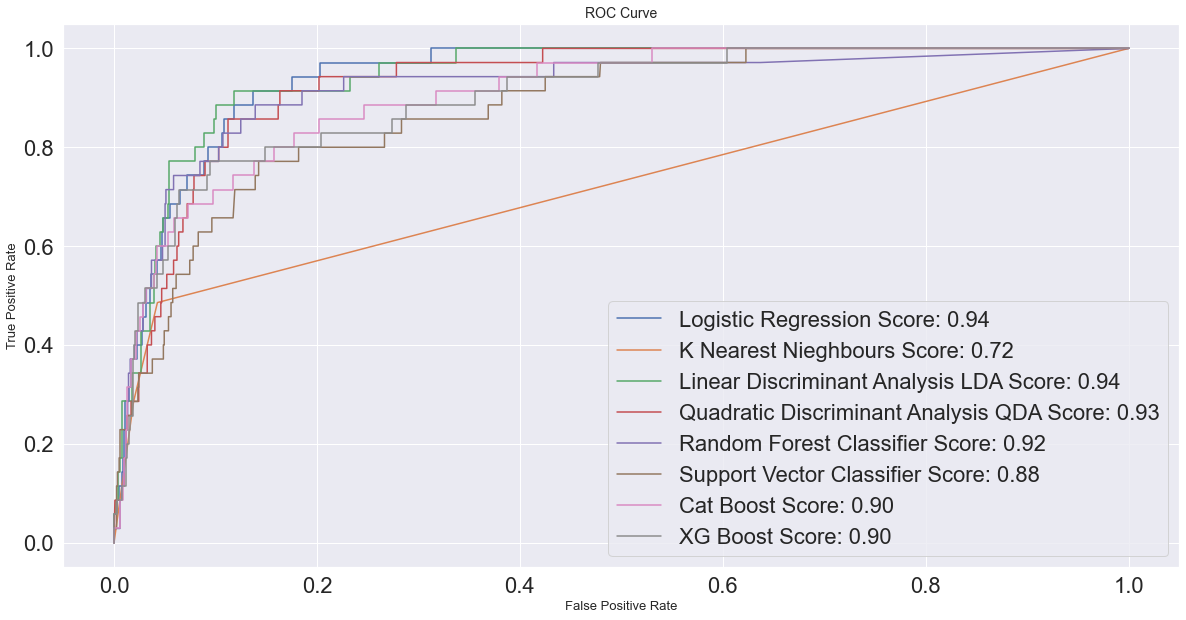

In [50]:
plt.figure(figsize=(20,10))
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
for index, row in ValidationTestResults.iterrows():
     plt.plot(row['False Positive Rate'],row['True Positive Rate'], label=row['Model Name'] + ' Score: {:.2f}'.format(row['ROC-AUC score']))

plt.legend()

## Results on Testing Set for Top 2 Models  / Feature Importance

I am selecting Logistic Regression and Random Forest Classifier as the best models for detecting bankruptcy

### Feature Importance

Feature Importance of Logistic Regression

<BarContainer object of 14 artists>

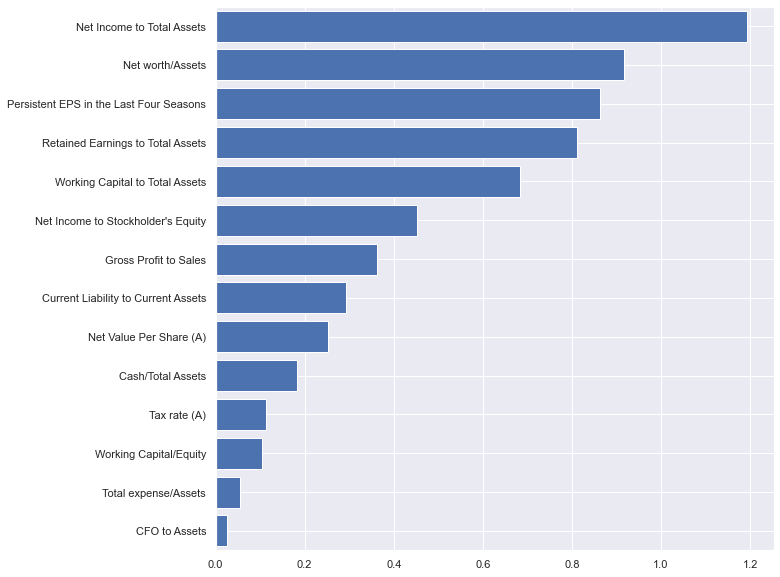

In [54]:
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
feat_importances = pd.Series(abs(BMLG.coef_[0]), index=X_train.columns)
feat_importances = feat_importances.sort_values()
plt.barh(feat_importances.index,feat_importances)

Feature Importance of Random Forest Classifier

<BarContainer object of 14 artists>

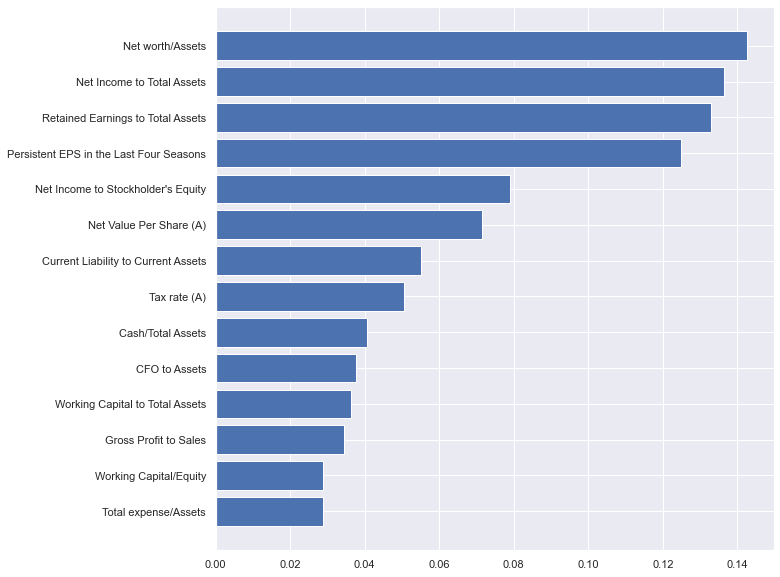

In [47]:
sns.set(font_scale=1)
sorted_idx = BMRF.feature_importances_.argsort()
plt.figure(figsize=(10,10))
plt.barh(predictors.columns[sorted_idx], BMRF.feature_importances_[sorted_idx])

### Logistic Regression

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       658
           1       0.16      0.71      0.26        24

    accuracy                           0.85       682
   macro avg       0.57      0.78      0.59       682
weighted avg       0.96      0.85      0.90       682



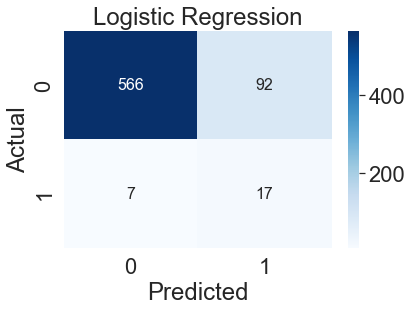

In [45]:
LDAPredictedValuesTest = BMLG.predict(X_test)
ConfusionMatrixLDA = confusion_matrix(y_test,LDAPredictedValuesTest)
LDAheatmap=sns.heatmap(ConfusionMatrixLDA, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g')
LDAheatmap.set(xlabel='Predicted', ylabel='Actual',title='Logistic Regression')
print(classification_report(y_test, LDAPredictedValuesTest))

### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       658
           1       0.32      0.50      0.39        24

    accuracy                           0.94       682
   macro avg       0.65      0.73      0.68       682
weighted avg       0.96      0.94      0.95       682



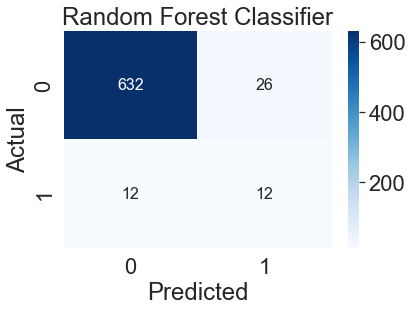

In [53]:
CBPredictedValuesTest = BMRF.predict(X_test)
ConfusionMatrixCB = confusion_matrix(y_test,CBPredictedValuesTest)
RFheatmap=sns.heatmap(ConfusionMatrixCB, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g')
RFheatmap.set(xlabel='Predicted', ylabel='Actual',title='Random Forest Classifier')
print(classification_report(y_test, CBPredictedValuesTest))

Conclusion the best model to use is Logistic Regression because for our case recall value is the most important metric and will help the most in filtering out companies close to bankruptcy as compared to precision.